Problem:

For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

In [1]:
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from   pylab import rcParams
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.tools.eval_measures as em
from   sklearn.metrics import  mean_squared_error
from   statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
from   IPython.display import display
import warnings
warnings.filterwarnings("ignore")
from IPython.display import display
from pylab import rcParams
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import month_plot
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.stattools import adfuller

C:\Users\murb\AppData\Local\Temp\1\ipykernel_33200\2219261478.py:3: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


1.Read the data as an appropriate Time Series data and plot the data.

In [2]:
df=pd.read_csv("Desktop/Sparkling.csv")

In [3]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [4]:
df.tail()

YearMonth  Sparkling
182   1995-03       1897
183   1995-04       1862
184   1995-05       1670
185   1995-06       1688
186   1995-07       2031

In [5]:
df.shape

(187, 2)

In [6]:
df.isnull().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [7]:
date = pd.date_range(start='1/1/1980', end='31/8/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-11-30', '1994-12-31', '1995-01-31', '1995-02-28',
               '1995-03-31', '1995-04-30', '1995-05-31', '1995-06-30',
               '1995-07-31', '1995-08-31'],
              dtype='datetime64[ns]', length=188, freq='M')

In [8]:
df['Time_Stamp'] = pd.DataFrame(date)
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [9]:
df.set_index('Time_Stamp',inplace=True)
df.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [10]:
df.drop(labels='YearMonth',axis=1,inplace=True)
df.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

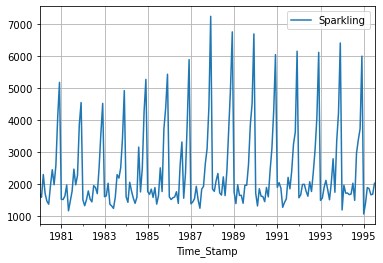

In [11]:
df.plot()
plt.grid();

2.Perform appropriate Exploratory Data Analysis to understand the data and also perform decomposition.

In [12]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

Yearly Boxplot

In [13]:
rcParams['figure.figsize'] = 20,8

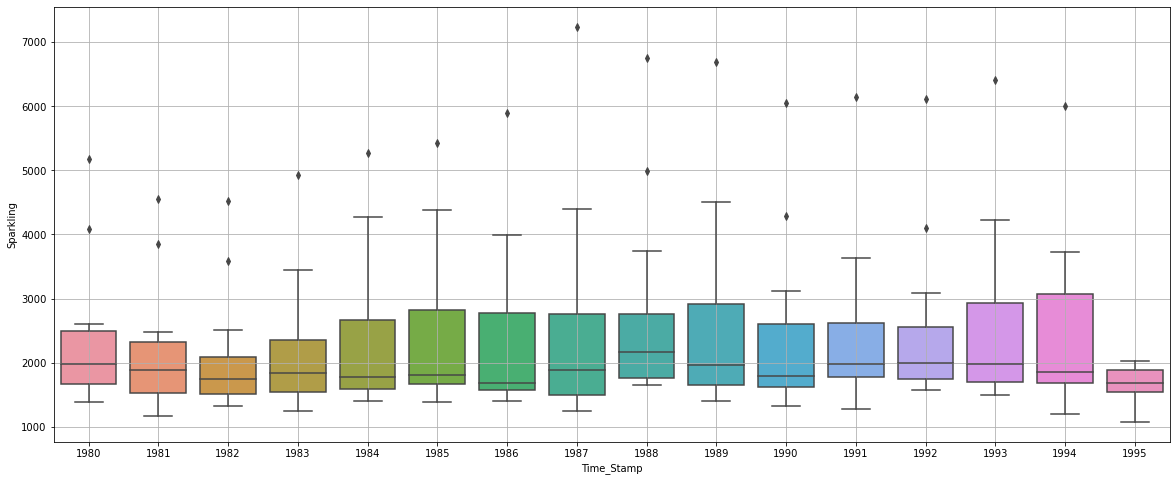

In [14]:
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

Monthly Boxplot

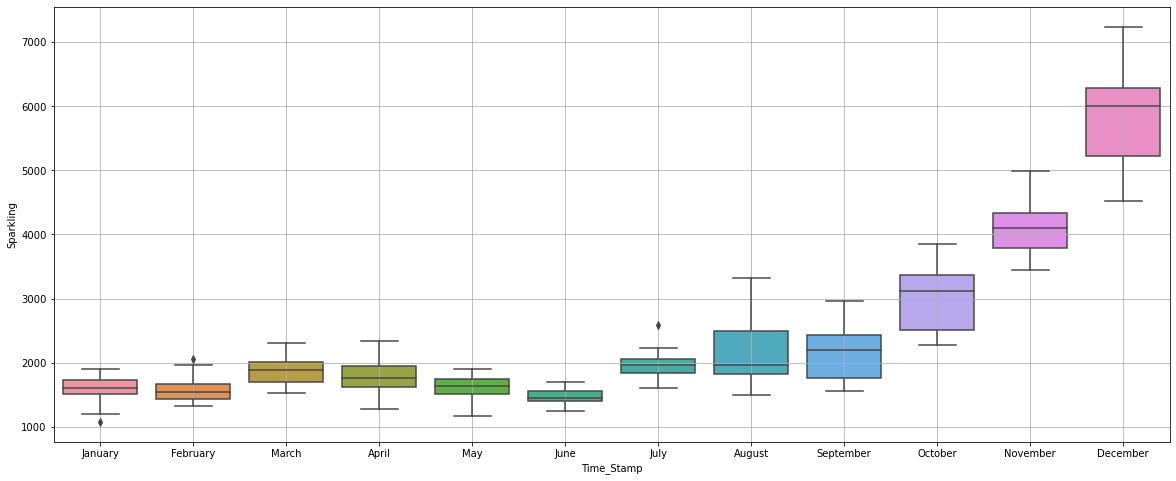

In [15]:
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

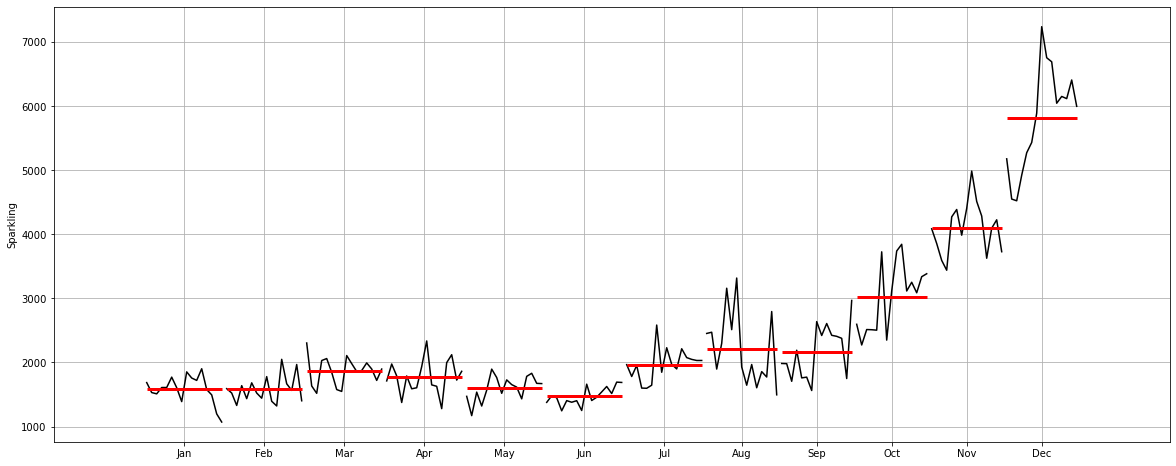

In [16]:
month_plot(df,ylabel='Sparkling')
plt.grid();

In [17]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, index = df.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

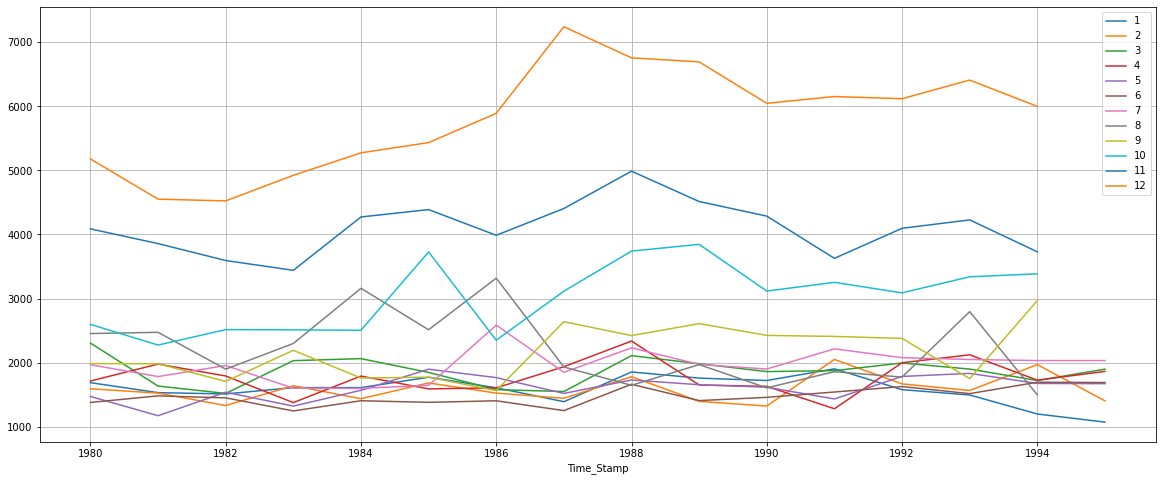

In [18]:
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

Empirical Cumulative Distribution

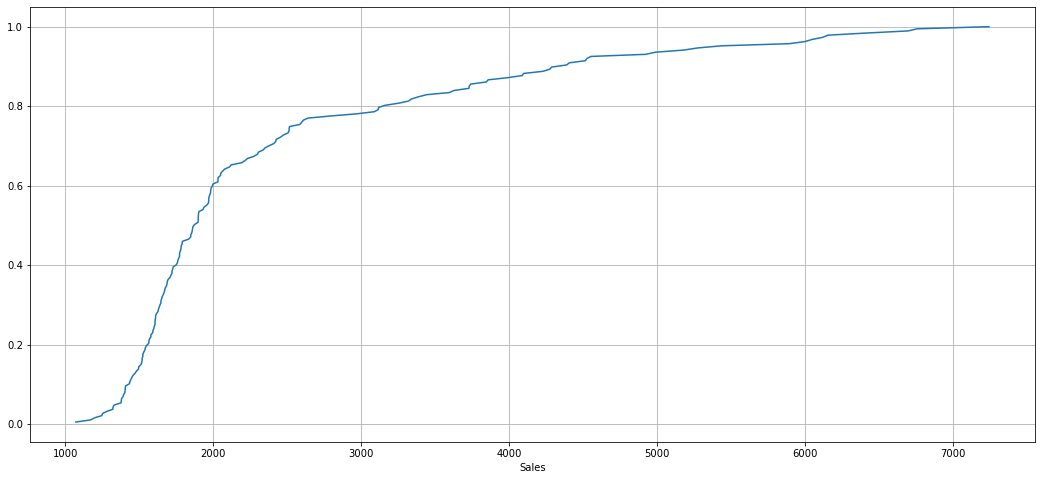

In [19]:
plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sales');

Average Sparkling sales per month

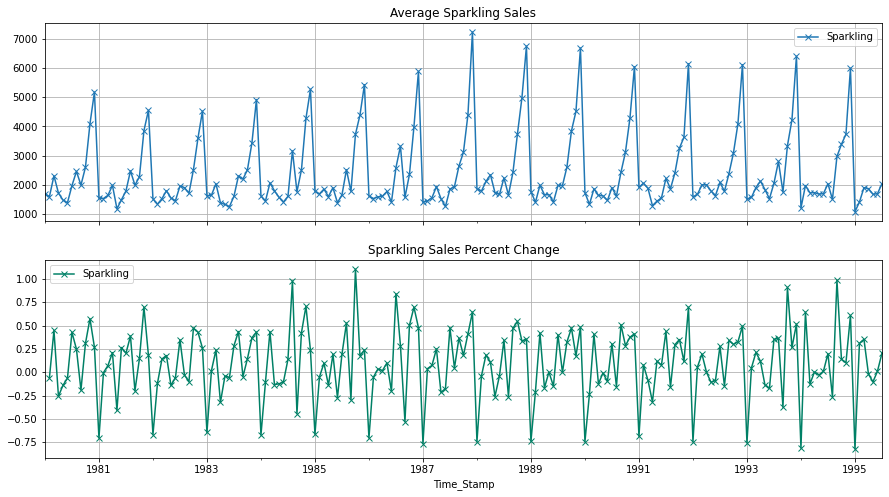

In [20]:
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()
fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))
ax1 = average.plot(legend=True,ax=axis1,marker='x',title="Average Sparkling Sales",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
ax2 = pct_change.plot(legend=True,ax=axis2,marker='x',colormap="summer",title="Sparkling Sales Percent Change",grid=True)

Decomposition 

Additive Decomposition

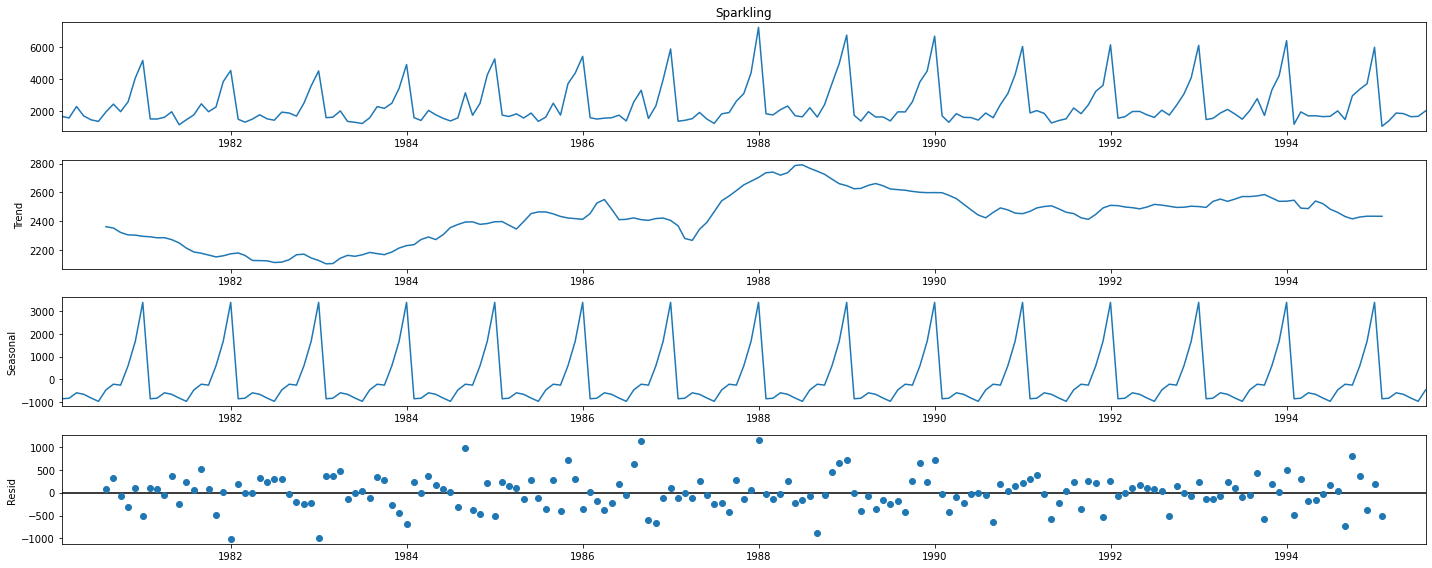

In [21]:
decomposition = seasonal_decompose(df["Sparkling"],model='additive')
decomposition.plot();

In [22]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [23]:
trend.head(10)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
Name: trend, dtype: float64

In [24]:
seasonality.head(10)

Time_Stamp
1980-01-31   -854.260599
1980-02-29   -830.350678
1980-03-31   -592.356630
1980-04-30   -658.490559
1980-05-31   -824.416154
1980-06-30   -967.434011
1980-07-31   -465.502265
1980-08-31   -214.332821
1980-09-30   -254.677265
1980-10-31    599.769957
Name: seasonal, dtype: float64

In [25]:
residual.head(10)

Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.353290
Name: resid, dtype: float64

Multiplicative decomposition

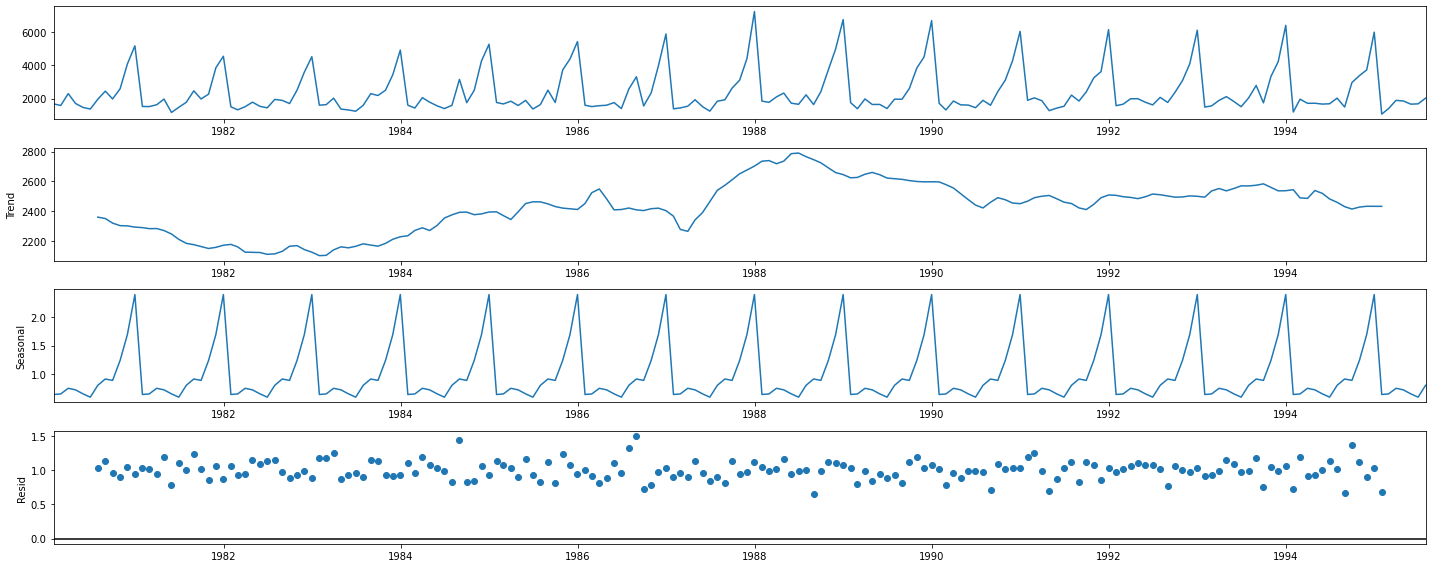

In [26]:
decomposition = seasonal_decompose(df,model='multiplicative')
decomposition.plot();

In [27]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

In [28]:
trend.head(10)

Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
Name: trend, dtype: float64

In [29]:
seasonality.head(10)

Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
Name: seasonal, dtype: float64

In [30]:
residual.head(10)

Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
Name: resid, dtype: float64

Autocorrelation and partial autocorrelation function plots

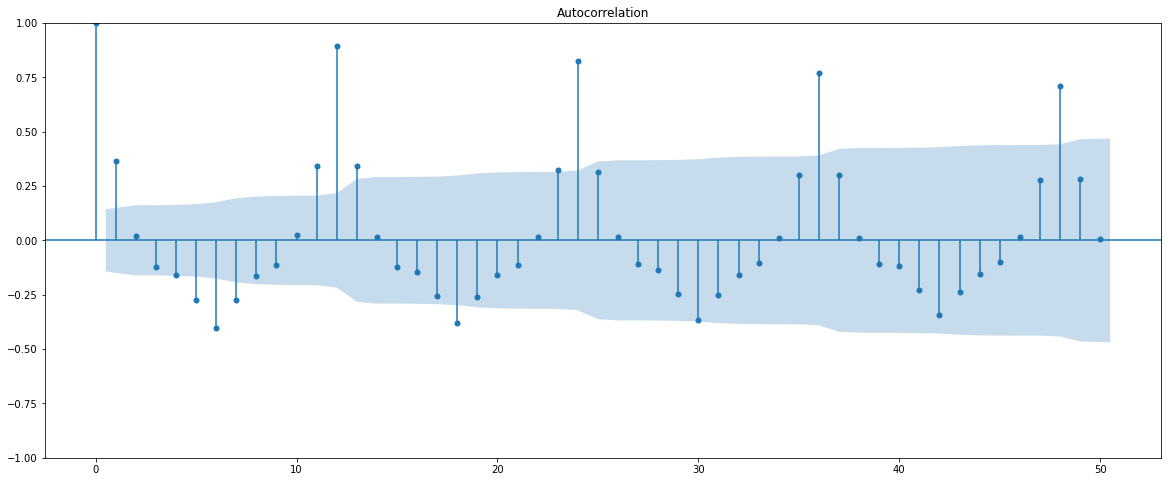

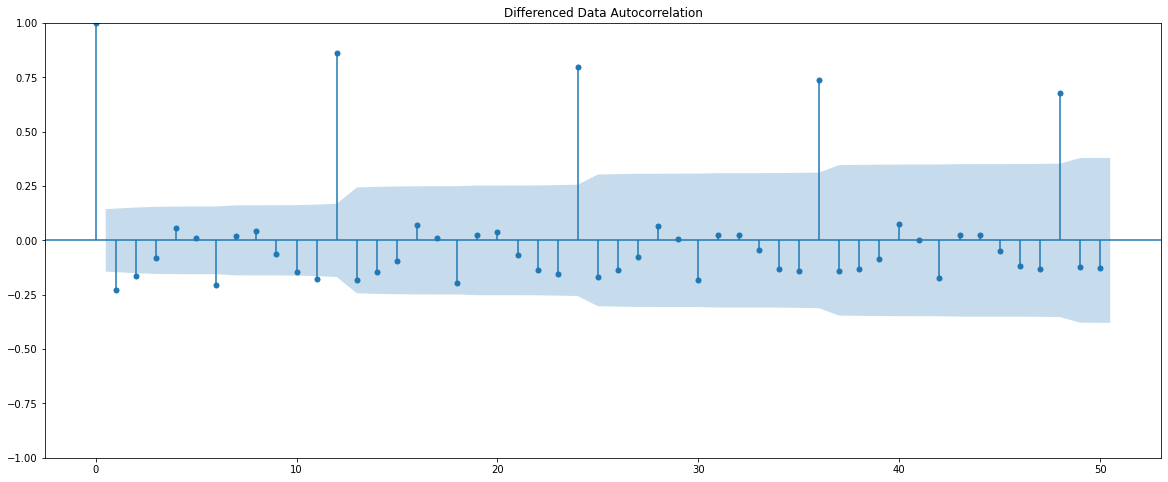

In [31]:
plot_acf(df['Sparkling'],lags=50)
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

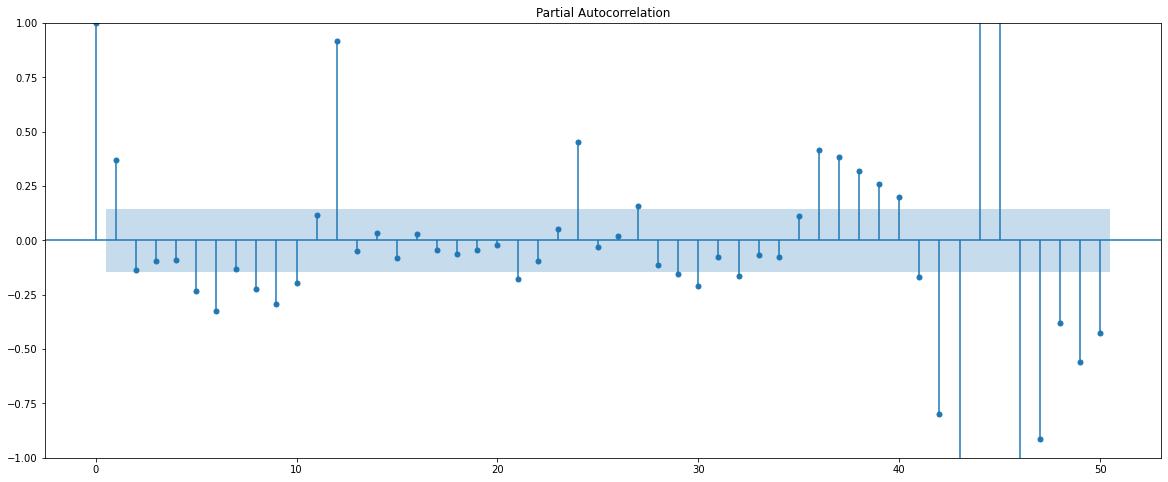

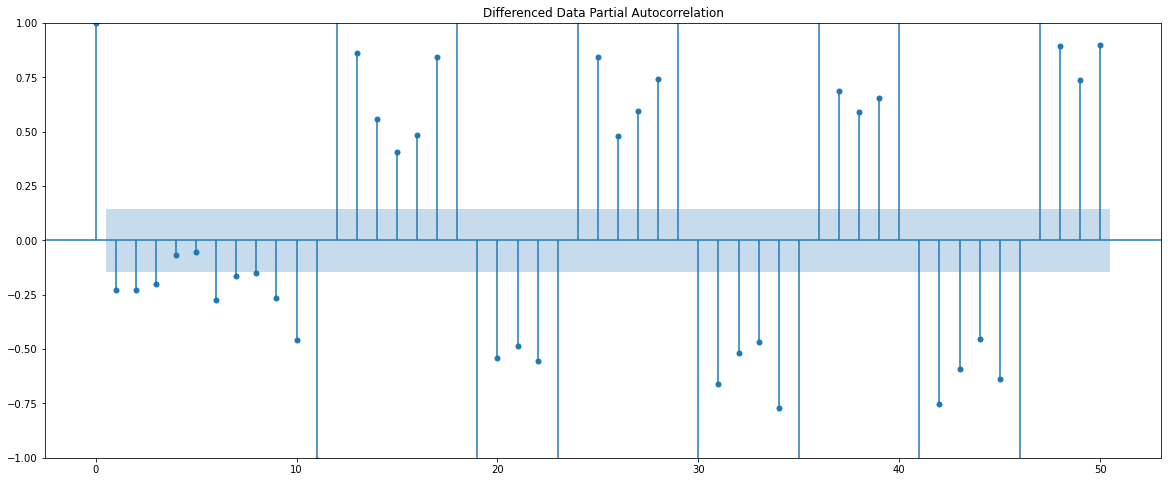

In [32]:
plot_pacf(df['Sparkling'],lags=50)
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

3.Split the data into training and test. The test data should start in 1991.

In [33]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [34]:
train.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [35]:
train.tail()

Sparkling
Time_Stamp           
1990-08-31       1605
1990-09-30       2424
1990-10-31       3116
1990-11-30       4286
1990-12-31       6047

In [36]:
test.head()

Sparkling
Time_Stamp           
1991-01-31       1902
1991-02-28       2049
1991-03-31       1874
1991-04-30       1279
1991-05-31       1432

In [37]:
test.tail()

Sparkling
Time_Stamp           
1995-03-31       1897
1995-04-30       1862
1995-05-31       1670
1995-06-30       1688
1995-07-31       2031

In [38]:
train.shape

(132, 1)

In [39]:
test.shape

(55, 1)

Checking for stationarity of Train data time series

In [40]:
def test_stationarity(timeseries):
    
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

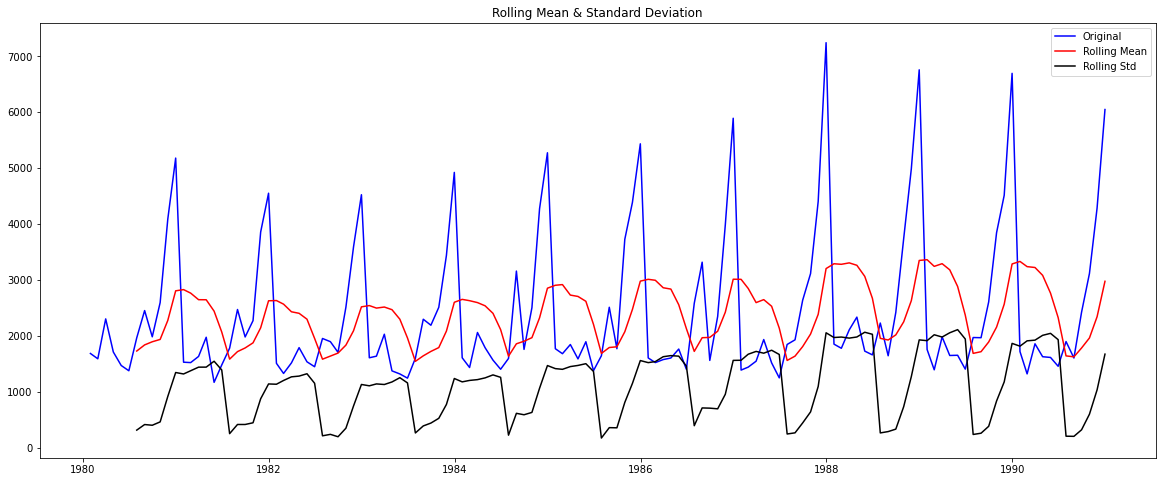

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [41]:
test_stationarity(train['Sparkling'])

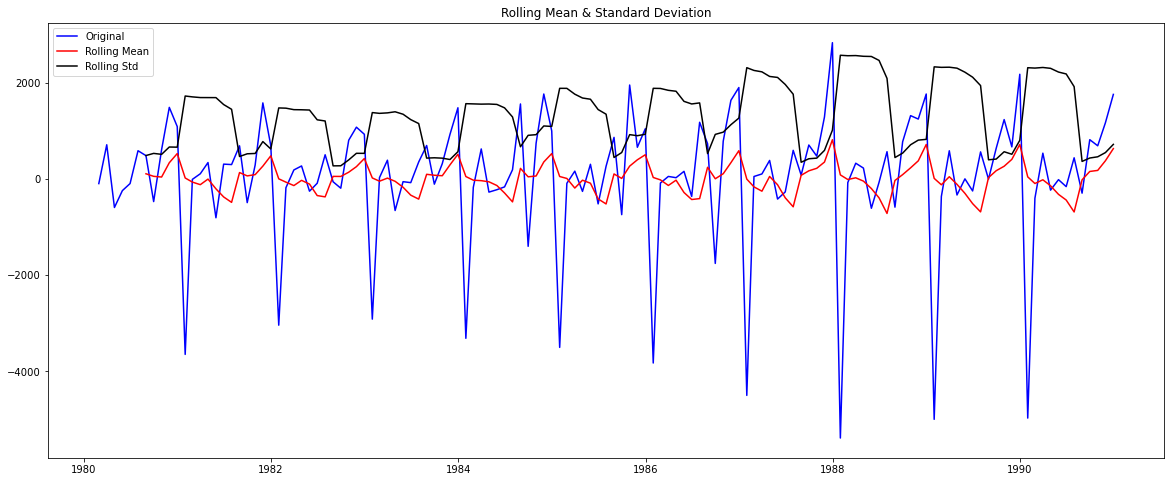

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [42]:
test_stationarity(train['Sparkling'].diff().dropna())

In [43]:
train.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 132 entries, 1980-01-31 to 1990-12-31
Data columns (total 1 columns):
 #   Column     Non-Null Count  Dtype
---  ------     --------------  -----
 0   Sparkling  132 non-null    int64
dtypes: int64(1)
memory usage: 2.1 KB


4.Build all the exponential smoothing models on the training data and evaluate the model using RMSE on the test data. Other additional models such as regression, naïve forecast models, simple average models, moving average models should also be built on the training data and check the performance on the test data using RMSE.

Simple exponential smoothing model

In [44]:
SES_train = train.copy()
SES_test = test.copy()

In [45]:
model_SES = SimpleExpSmoothing(train,initialization_method='estimated')
model_SES_autofit = model_SES.fit(optimized=True)

In [46]:
model_SES_autofit.params

{'smoothing_level': 0.07029120765764557,
 'smoothing_trend': nan,
 'smoothing_seasonal': nan,
 'damping_trend': nan,
 'initial_level': 1764.0137060346985,
 'initial_trend': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [47]:
SES_predict = model_SES_autofit.forecast(steps=len(test))
SES_predict

1991-01-31    2804.675124
1991-02-28    2804.675124
1991-03-31    2804.675124
1991-04-30    2804.675124
1991-05-31    2804.675124
1991-06-30    2804.675124
1991-07-31    2804.675124
1991-08-31    2804.675124
1991-09-30    2804.675124
1991-10-31    2804.675124
1991-11-30    2804.675124
1991-12-31    2804.675124
1992-01-31    2804.675124
1992-02-29    2804.675124
1992-03-31    2804.675124
1992-04-30    2804.675124
1992-05-31    2804.675124
1992-06-30    2804.675124
1992-07-31    2804.675124
1992-08-31    2804.675124
1992-09-30    2804.675124
1992-10-31    2804.675124
1992-11-30    2804.675124
1992-12-31    2804.675124
1993-01-31    2804.675124
1993-02-28    2804.675124
1993-03-31    2804.675124
1993-04-30    2804.675124
1993-05-31    2804.675124
1993-06-30    2804.675124
1993-07-31    2804.675124
1993-08-31    2804.675124
1993-09-30    2804.675124
1993-10-31    2804.675124
1993-11-30    2804.675124
1993-12-31    2804.675124
1994-01-31    2804.675124
1994-02-28    2804.675124
1994-03-31  

Plotting the Training data, Test data and the forecasted values

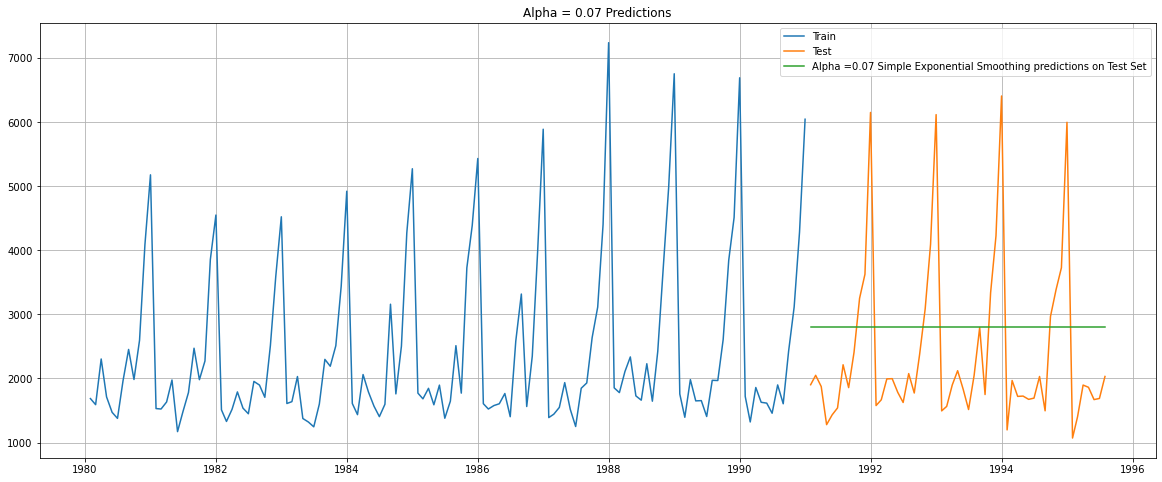

In [48]:
rcParams['figure.figsize'] = 20,8
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict, label='Alpha =0.07 Simple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Alpha = 0.07 Predictions');

In [49]:
def MAPE(y_true, y_pred):
    return np.mean((np.abs(y_true-y_pred))/(y_true))*100

In [50]:
print('Simple Exponential Smoothing RMSE:',mean_squared_error(test.values,SES_predict.values,squared=False))
print('Simple Exponential Smoothing RMSE (calculated using statsmodels):',em.rmse(test.values,SES_predict.values)[0])

Simple Exponential Smoothing RMSE: 1338.0083844916467
Simple Exponential Smoothing RMSE (calculated using statsmodels): 1338.0083844916464


In [51]:
resultsDf = pd.DataFrame({'Test RMSE': [em.rmse(test.values,SES_predict.values)[0]]},index=['Alpha= 0.07, SES'])
resultsDf

Test RMSE
Alpha= 0.07, SES  1338.008384

Double Exponential smoothing

In [52]:
DES_train = train.copy()
DES_test = test.copy()

In [53]:
model_DES = Holt(train,initialization_method='estimated')
model_DES = model_DES.fit()
print('')
print('Holt model Exponential Smoothing Estimated Parameters')
print('')
print(model_DES.params)


Holt model Exponential Smoothing Estimated Parameters

{'smoothing_level': 0.6649999999999999, 'smoothing_trend': 0.0001, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 1502.1999999999991, 'initial_trend': 74.87272727272739, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [54]:
DES_predict =  model_DES.forecast(len(test))
DES_predict

1991-01-31    5401.733026
1991-02-28    5476.005230
1991-03-31    5550.277433
1991-04-30    5624.549637
1991-05-31    5698.821840
1991-06-30    5773.094044
1991-07-31    5847.366248
1991-08-31    5921.638451
1991-09-30    5995.910655
1991-10-31    6070.182858
1991-11-30    6144.455062
1991-12-31    6218.727266
1992-01-31    6292.999469
1992-02-29    6367.271673
1992-03-31    6441.543876
1992-04-30    6515.816080
1992-05-31    6590.088284
1992-06-30    6664.360487
1992-07-31    6738.632691
1992-08-31    6812.904894
1992-09-30    6887.177098
1992-10-31    6961.449302
1992-11-30    7035.721505
1992-12-31    7109.993709
1993-01-31    7184.265912
1993-02-28    7258.538116
1993-03-31    7332.810320
1993-04-30    7407.082523
1993-05-31    7481.354727
1993-06-30    7555.626930
1993-07-31    7629.899134
1993-08-31    7704.171338
1993-09-30    7778.443541
1993-10-31    7852.715745
1993-11-30    7926.987948
1993-12-31    8001.260152
1994-01-31    8075.532356
1994-02-28    8149.804559
1994-03-31  

Plotting the Training data, Test data and the forecasted values

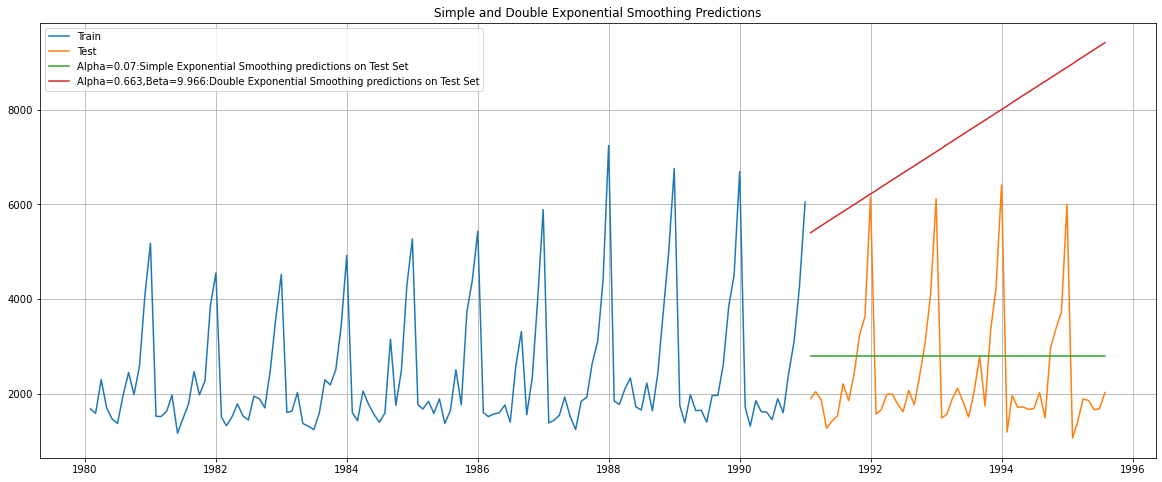

In [55]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.663,Beta=9.966:Double Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple and Double Exponential Smoothing Predictions');

In [56]:
print('Double Exponential Smoothing RMSE:',mean_squared_error(test.values,DES_predict.values,squared=False))

Double Exponential Smoothing RMSE: 5291.8798332269125


In [57]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,DES_predict.values,squared=False)]}
                           ,index=['Alpha= 0.663, Beta= 9.966, DES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                1338.008384
Alpha= 0.663, Beta= 9.966, DES  5291.879833

Triple Exponential Smoothing

In [58]:
TES_train = train.copy()
TES_test = test.copy()

In [59]:
model_TES = ExponentialSmoothing(train,trend='additive',seasonal='additive',initialization_method='estimated')
model_TES = model_TES.fit()
print('')
print('Holt Winters model Exponential Smoothing Estimated Parameters')
print('')
print(model_TES.params)


Holt Winters model Exponential Smoothing Estimated Parameters

{'smoothing_level': 0.11127227248079453, 'smoothing_trend': 0.012360804305088534, 'smoothing_seasonal': 0.46071766688111543, 'damping_trend': nan, 'initial_level': 2356.577980956387, 'initial_trend': -0.10243675533021725, 'initial_seasons': array([-636.23319334, -722.9832009 , -398.64410813, -473.43045416,
       -808.42473284, -815.34991402, -384.23065038,   72.99484403,
       -237.44226045,  272.32608272, 1541.37737052, 2590.07692296]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


In [60]:
TES_predict =  model_TES.forecast(len(test))
TES_predict

1991-01-31    1490.402890
1991-02-28    1204.525152
1991-03-31    1688.734182
1991-04-30    1551.226125
1991-05-31    1461.197883
1991-06-30    1278.646707
1991-07-31    1804.885616
1991-08-31    1678.955032
1991-09-30    2315.373126
1991-10-31    3224.976222
1991-11-30    4299.301434
1991-12-31    6410.712237
1992-01-31    1482.829908
1992-02-29    1196.952170
1992-03-31    1681.161200
1992-04-30    1543.653143
1992-05-31    1453.624901
1992-06-30    1271.073725
1992-07-31    1797.312634
1992-08-31    1671.382050
1992-09-30    2307.800144
1992-10-31    3217.403240
1992-11-30    4291.728452
1992-12-31    6403.139255
1993-01-31    1475.256926
1993-02-28    1189.379188
1993-03-31    1673.588218
1993-04-30    1536.080160
1993-05-31    1446.051919
1993-06-30    1263.500743
1993-07-31    1789.739652
1993-08-31    1663.809068
1993-09-30    2300.227162
1993-10-31    3209.830258
1993-11-30    4284.155470
1993-12-31    6395.566273
1994-01-31    1467.683944
1994-02-28    1181.806206
1994-03-31  

Plotting the Training data, Test data and the forecasted values

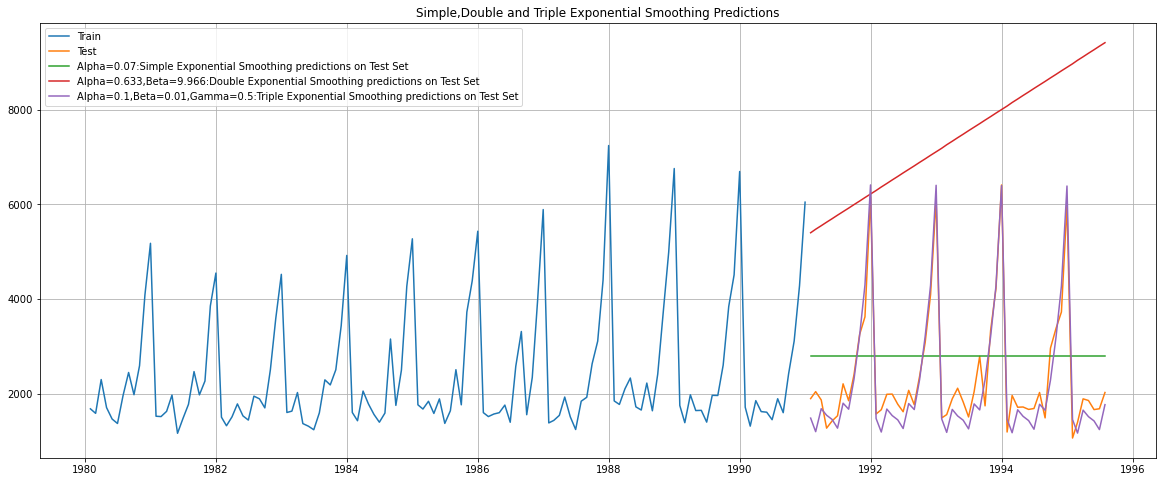

In [61]:
plt.plot(train, label='Train')
plt.plot(test, label='Test')
plt.plot(SES_predict, label='Alpha=0.07:Simple Exponential Smoothing predictions on Test Set')
plt.plot(DES_predict, label='Alpha=0.633,Beta=9.966:Double Exponential Smoothing predictions on Test Set')
plt.plot(TES_predict, label='Alpha=0.1,Beta=0.01,Gamma=0.5:Triple Exponential Smoothing predictions on Test Set')
plt.legend(loc='best')
plt.grid()
plt.title('Simple,Double and Triple Exponential Smoothing Predictions');

In [62]:
print('Triple Exponential Smoothing RMSE:',mean_squared_error(test.values,TES_predict.values,squared=False))

Triple Exponential Smoothing RMSE: 378.95102286703


In [63]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [mean_squared_error(test.values,TES_predict.values,squared=False)]}
                           ,index=['Alpha=0.1, Beta=0.01, Gamma=0.5, TES'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.008384
Alpha= 0.663, Beta= 9.966, DES        5291.879833
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   378.951023

Linear Regression

In [64]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [65]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [66]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time
print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [67]:
lr = LinearRegression()
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

In [68]:
test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

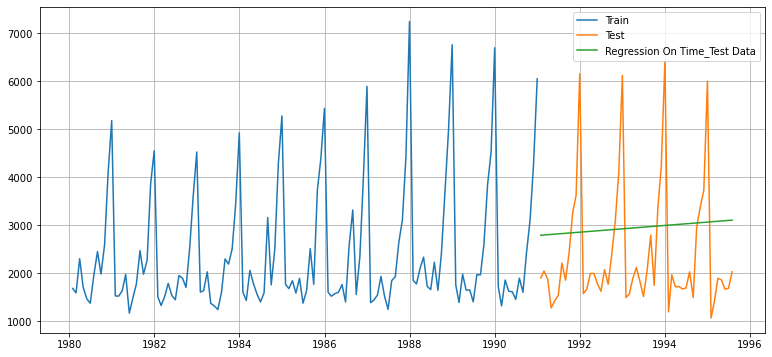

In [69]:
plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.legend(loc='best')
plt.grid();

Test data - RMSE

In [70]:
rmse_model1_test = mean_squared_error(test['Sparkling'],test_predictions_model1,squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model1_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 1389.135


In [71]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model1_test]}
                           ,index=['Regression'])

resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.008384
Alpha= 0.663, Beta= 9.966, DES        5291.879833
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   378.951023
Regression                            1389.135175

Naive Approach

In [72]:
NaiveModel_train = train.copy()
NaiveModel_test = test.copy()

In [73]:
NaiveModel_test['naive'] = np.asarray(train['Sparkling'])[len(np.asarray(train['Sparkling']))-1]
NaiveModel_test['naive'].head()

Time_Stamp
1991-01-31    6047
1991-02-28    6047
1991-03-31    6047
1991-04-30    6047
1991-05-31    6047
Name: naive, dtype: int64

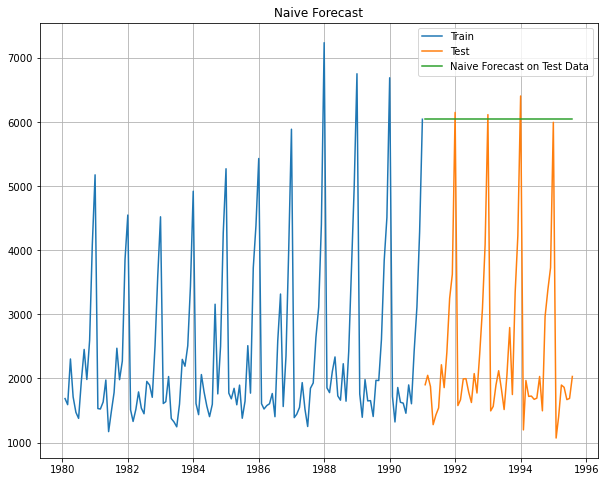

In [74]:
plt.figure(figsize=(10,8))
plt.plot(NaiveModel_train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(NaiveModel_test['naive'], label='Naive Forecast on Test Data')
plt.legend(loc='best')
plt.title("Naive Forecast")
plt.grid();

Test data - RMSE

In [75]:
rmse_model2_test = mean_squared_error(test['Sparkling'],NaiveModel_test['naive'],squared=False)
print("For RegressionOnTime forecast on the Test Data,  RMSE is %3.3f" %(rmse_model2_test))

For RegressionOnTime forecast on the Test Data,  RMSE is 3864.279


In [76]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model2_test]},index=['Naive Model'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.008384
Alpha= 0.663, Beta= 9.966, DES        5291.879833
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   378.951023
Regression                            1389.135175
Naive Model                           3864.279352

Simple Average

In [77]:
SimpleAverage_train = train.copy()
SimpleAverage_test = test.copy()

In [78]:
SimpleAverage_test['mean_forecast'] = train['Sparkling'].mean()
SimpleAverage_test.head()

Sparkling  mean_forecast
Time_Stamp                          
1991-01-31       1902    2403.780303
1991-02-28       2049    2403.780303
1991-03-31       1874    2403.780303
1991-04-30       1279    2403.780303
1991-05-31       1432    2403.780303

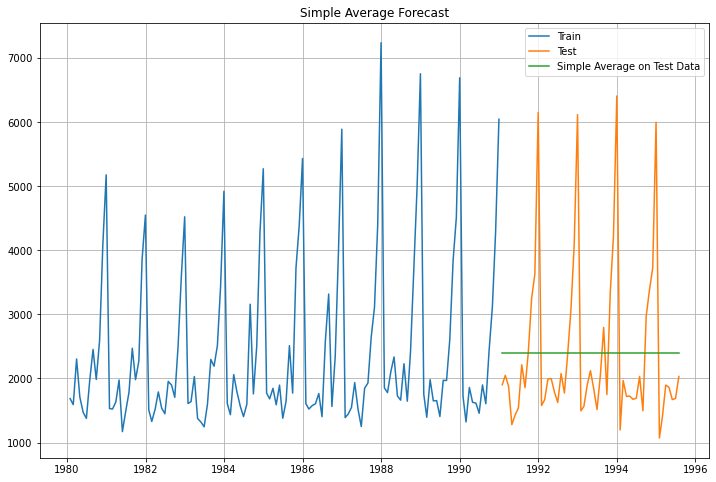

In [79]:
plt.figure(figsize=(12,8))
plt.plot(SimpleAverage_train['Sparkling'], label='Train')
plt.plot(SimpleAverage_test['Sparkling'], label='Test')
plt.plot(SimpleAverage_test['mean_forecast'], label='Simple Average on Test Data')
plt.legend(loc='best')
plt.title("Simple Average Forecast")
plt.grid();

Test data - RMSE

In [80]:
rmse_model3_test = mean_squared_error(test['Sparkling'],SimpleAverage_test['mean_forecast'],squared=False)
print("For Simple Average forecast on the Test Data,  RMSE is %3.3f" %(rmse_model3_test))

For Simple Average forecast on the Test Data,  RMSE is 1275.082


In [81]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model3_test]},index=['Simple Average Model'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.008384
Alpha= 0.663, Beta= 9.966, DES        5291.879833
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   378.951023
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804

Moving Average

In [82]:
MovingAverage = df.copy()
MovingAverage.head()

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-29       1591
1980-03-31       2304
1980-04-30       1712
1980-05-31       1471

In [83]:
MovingAverage['Trailing_2'] = MovingAverage['Sparkling'].rolling(2).mean()
MovingAverage['Trailing_4'] = MovingAverage['Sparkling'].rolling(4).mean()
MovingAverage['Trailing_6'] = MovingAverage['Sparkling'].rolling(6).mean()
MovingAverage['Trailing_9'] = MovingAverage['Sparkling'].rolling(9).mean()

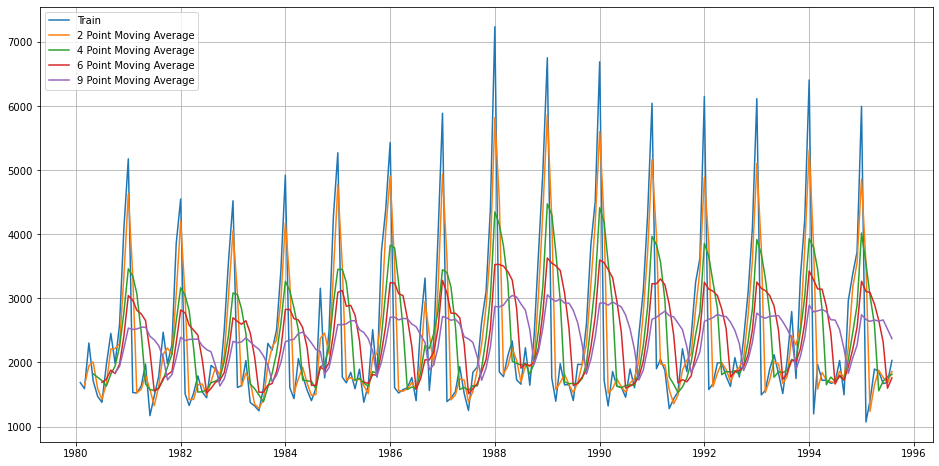

In [84]:
plt.figure(figsize=(16,8))
plt.plot(MovingAverage['Sparkling'], label='Train')
plt.plot(MovingAverage['Trailing_2'], label='2 Point Moving Average')
plt.plot(MovingAverage['Trailing_4'], label='4 Point Moving Average')
plt.plot(MovingAverage['Trailing_6'],label = '6 Point Moving Average')
plt.plot(MovingAverage['Trailing_9'],label = '9 Point Moving Average')
plt.legend(loc = 'best')
plt.grid();

In [85]:
trailing_MovingAverage_train=MovingAverage[MovingAverage.index.year < 1991]
trailing_MovingAverage_test=MovingAverage[MovingAverage.index.year>=1991]

Plotting the Training data, Test data and the forecasted values

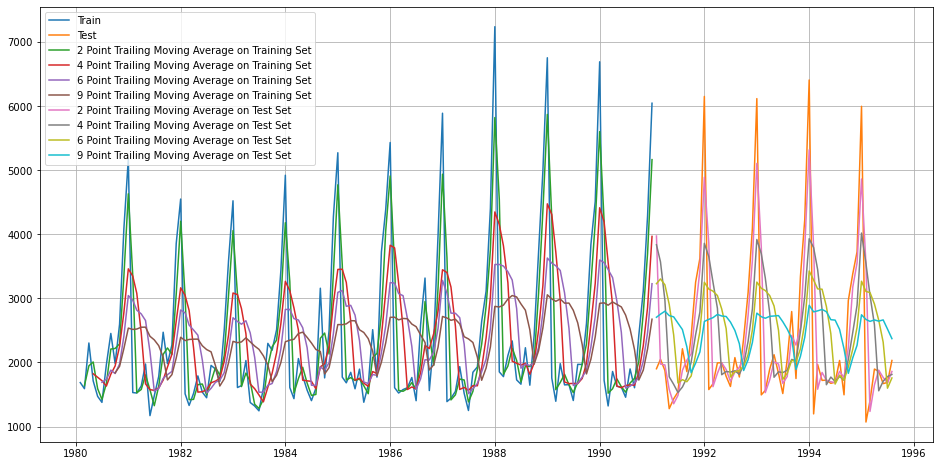

In [86]:
plt.figure(figsize=(16,8))
plt.plot(trailing_MovingAverage_train['Sparkling'], label='Train')
plt.plot(trailing_MovingAverage_test['Sparkling'], label='Test')
plt.plot(trailing_MovingAverage_train['Trailing_2'], label='2 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_4'], label='4 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_6'],label = '6 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_train['Trailing_9'],label = '9 Point Trailing Moving Average on Training Set')
plt.plot(trailing_MovingAverage_test['Trailing_2'], label='2 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_4'], label='4 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_6'],label = '6 Point Trailing Moving Average on Test Set')
plt.plot(trailing_MovingAverage_test['Trailing_9'],label = '9 Point Trailing Moving Average on Test Set')
plt.legend(loc = 'best')
plt.grid();

In [87]:
rmse_model4_test_2 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_2'],squared=False)
print("For 2 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_2))
rmse_model4_test_4 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_4'],squared=False)
print("For 4 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_4))
rmse_model4_test_6 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_6'],squared=False)
print("For 6 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f" %(rmse_model4_test_6))
rmse_model4_test_9 = mean_squared_error(test['Sparkling'],trailing_MovingAverage_test['Trailing_9'],squared=False)
print("For 9 point Moving Average Model forecast on the Training Data,  RMSE is %3.3f " %(rmse_model4_test_9))

For 2 point Moving Average Model forecast on the Training Data,  RMSE is 813.401
For 4 point Moving Average Model forecast on the Training Data,  RMSE is 1156.590
For 6 point Moving Average Model forecast on the Training Data,  RMSE is 1283.927
For 9 point Moving Average Model forecast on the Training Data,  RMSE is 1346.278 


In [88]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model4_test_2,rmse_model4_test_4
                                          ,rmse_model4_test_6,rmse_model4_test_9]}
                           ,index=['2point Trailing Moving Average','4 point Trailing Moving Average'
                                   ,'6point Trailing Moving Average','9 point Trailing Moving Average'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.008384
Alpha= 0.663, Beta= 9.966, DES        5291.879833
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   378.951023
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315

5.Check for the stationarity of the data on which the model is being built on using appropriate statistical tests and also mention the hypothesis for the statistical test. If the data is found to be non-stationary, take appropriate steps to make it stationary. Check the new data for stationarity and comment.
Note: Stationarity should be checked at alpha = 0.05.

In [89]:
dftest = adfuller(df,regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -1.798
DF test p-value is 0.7055958459932644
Number of lags used 12


In [90]:
dftest = adfuller(df.diff().dropna(),regression='ct')
print('DF test statistic is %3.3f' %dftest[0])
print('DF test p-value is' ,dftest[1])
print('Number of lags used' ,dftest[2])

DF test statistic is -44.912
DF test p-value is 0.0
Number of lags used 10


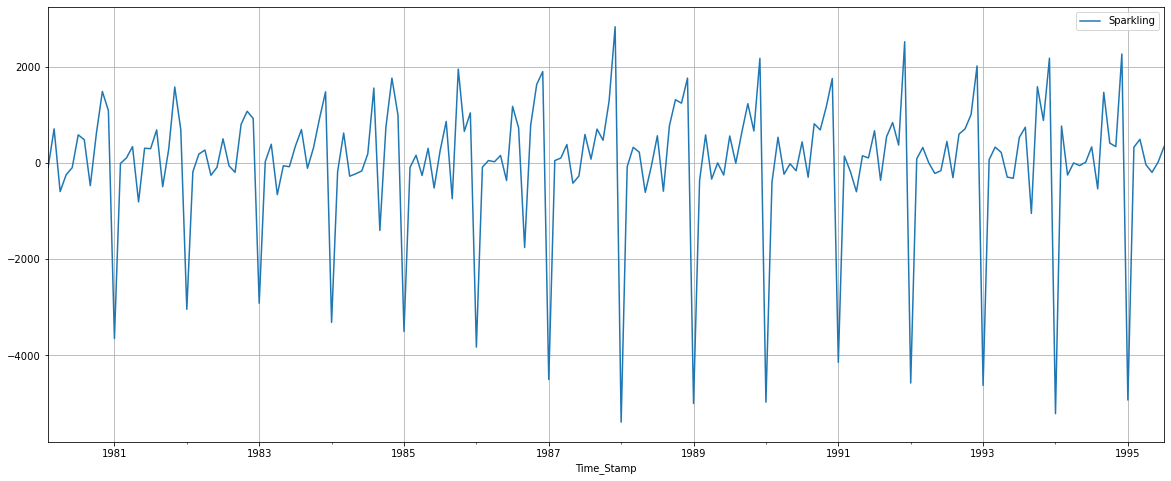

In [91]:
df.diff().dropna().plot(grid=True);

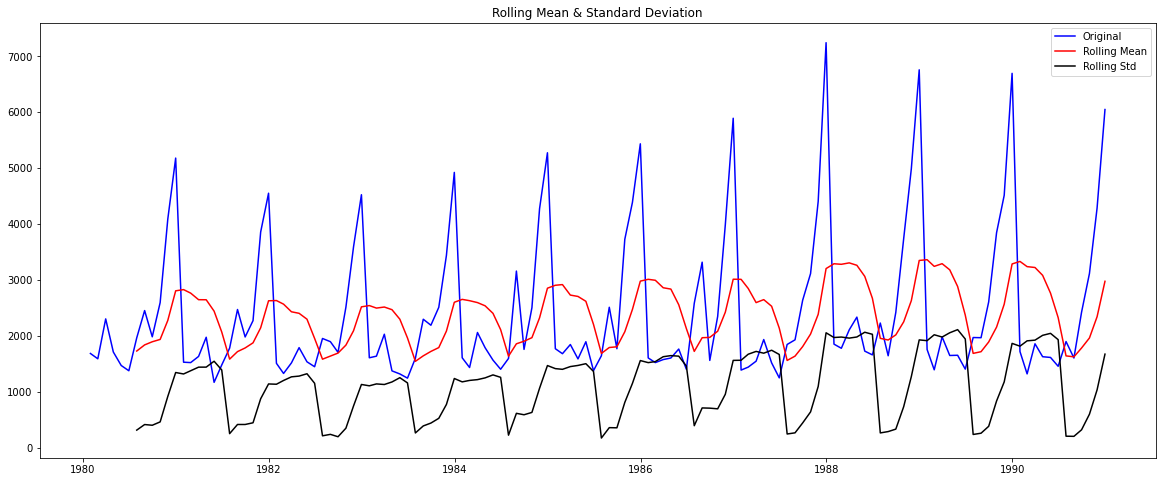

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [92]:
test_stationarity(train['Sparkling'])

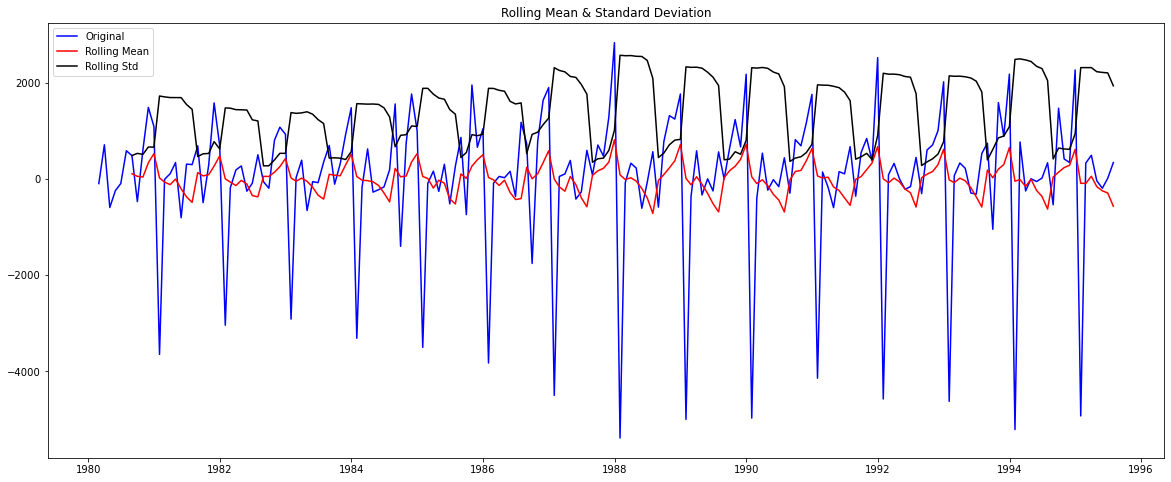

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [93]:
test_stationarity(df['Sparkling'].diff().dropna())

6.Build an automated version of the ARIMA/SARIMA model in which the parameters are selected using the lowest Akaike Information Criteria (AIC) on the training data and evaluate this model on the test data using RMSE.

In [94]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [95]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [96]:
import statsmodels.api as sm
for param in pdq:
    ARIMA_model = sm.tsa.arima.ARIMA(train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2267.6630357855465
ARIMA(0, 1, 1) - AIC:2263.060015591336
ARIMA(0, 1, 2) - AIC:2234.408323131676
ARIMA(1, 1, 0) - AIC:2266.6085393190087
ARIMA(1, 1, 1) - AIC:2235.755094673383
ARIMA(1, 1, 2) - AIC:2234.527200451863
ARIMA(2, 1, 0) - AIC:2260.365743968086
ARIMA(2, 1, 1) - AIC:2233.777626295947
ARIMA(2, 1, 2) - AIC:2213.5092127011176


In [97]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2213.509213
7  (2, 1, 1)  2233.777626
2  (0, 1, 2)  2234.408323
5  (1, 1, 2)    2234.5272
4  (1, 1, 1)  2235.755095
6  (2, 1, 0)  2260.365744
1  (0, 1, 1)  2263.060016
3  (1, 1, 0)  2266.608539
0  (0, 1, 0)  2267.663036

In [98]:
auto_ARIMA = sm.tsa.arima.ARIMA(train['Sparkling'], order=(2,1,2),freq='M')
results_auto_ARIMA = auto_ARIMA.fit()
print(results_auto_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1101.755
Date:                Sun, 26 Mar 2023   AIC                           2213.509
Time:                        23:23:31   BIC                           2227.885
Sample:                    01-31-1980   HQIC                          2219.351
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.3121      0.046     28.782      0.000       1.223       1.401
ar.L2         -0.5593      0.072     -7.740      0.000      -0.701      -0.418
ma.L1         -1.9917      0.109    -18.215      0.0

Predict on the Test Set

In [99]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(test))

In [100]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print(rmse)

1299.9804681457053


In [101]:
rmse_model4_test = mean_squared_error(test['Sparkling'],predicted_auto_ARIMA,squared=False)
print("For ARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model4_test))

For ARIMA on the Test Data,  RMSE is 1299.980


In [102]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model4_test]},index=['ARIMA(2,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.008384
Alpha= 0.663, Beta= 9.966, DES        5291.879833
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   378.951023
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315
ARIMA(2,1,2)                          1299.980468

Sarima

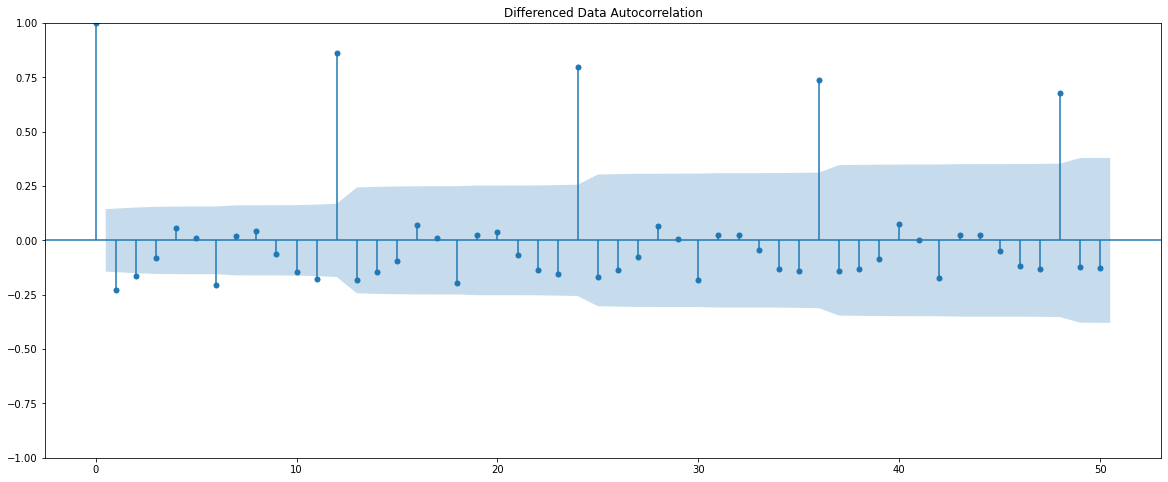

In [103]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

Setting the seasonality as 6 for the first iteration of the auto Sarima model

In [104]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [105]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [106]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6) - AIC:2152.3780761716284
SARIMA(0, 1, 0)x(0, 0, 2, 6) - AIC:1955.6355536890155
SARIMA(0, 1, 0)x(1, 0, 0, 6) - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6) - AIC:2079.5599844431604
SARIMA(0, 1, 0)x(1, 0, 2, 6) - AIC:1926.9360111492388
SARIMA(0, 1, 0)x(2, 0, 0, 6) - AIC:1839.4012986872267
SARIMA(0, 1, 0)x(2, 0, 1, 6) - AIC:1841.1993617510523
SARIMA(0, 1, 0)x(2, 0, 2, 6) - AIC:1810.9177805657193
SARIMA(0, 1, 1)x(0, 0, 0, 6) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 6) - AIC:2130.565285908284
SARIMA(0, 1, 1)x(0, 0, 2, 6) - AIC:1918.187633954335
SARIMA(0, 1, 1)x(1, 0, 0, 6) - AIC:2139.573242878457
SARIMA(0, 1, 1)x(1, 0, 1, 6) - AIC:2006.5174298135948
SARIMA(0, 1, 1)x(1, 0, 2, 6) - AIC:1855.7093275541868
SARIMA(0, 1, 1)x(2, 0, 0, 6) - AIC:1798.788510384362
SARIMA(0, 1, 1)x(2, 0, 1, 6) - AIC:1800.771793365115
SARIMA(0, 1, 1)x(2, 0, 2, 6) - AIC:1741.6473514651523
SARIMA(0, 1, 2)x(0, 0, 0, 6) - AI

In [107]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.670867
26  (0, 1, 2)  (2, 0, 2, 6)  1727.888804
80  (2, 1, 2)  (2, 0, 2, 6)  1729.189833
17  (0, 1, 1)  (2, 0, 2, 6)  1741.647351
44  (1, 1, 1)  (2, 0, 2, 6)  1743.379778

In [108]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(0, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(0, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -856.944
Date:                           Sun, 26 Mar 2023   AIC                           1727.889
Time:                                   23:24:07   BIC                           1747.164
Sample:                                        0   HQIC                          1735.713
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.7850      0.103     -7.653      0.000      -0.986      -0.584
ma.L2         -0.0976      0.112     -0.871

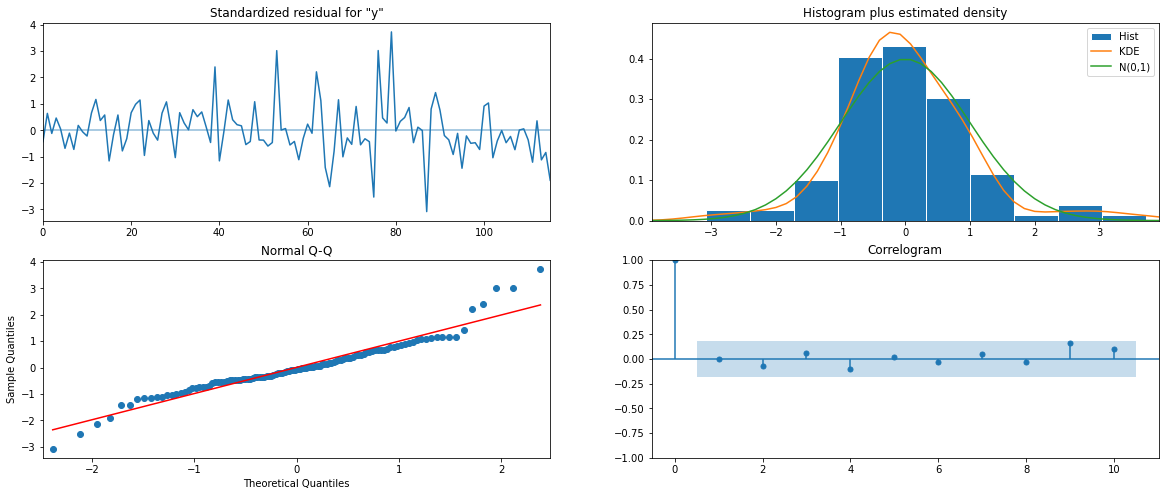

In [109]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

Predict on the test set using this model

In [110]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(test))
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1375.583352  384.084769     622.791038    2128.375666
1  1116.790527  392.858481     346.802053    1886.779001
2  1667.584830  395.432089     892.552177    2442.617484
3  1528.382583  397.992153     748.332298    2308.432869
4  1372.306313  400.535908     587.270359    2157.342267

In [111]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

601.2024081592865


Test Data - RMSE 

In [112]:
rmse_model5_test = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

601.2024081592865


In [113]:
rmse_model5_test = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print("For SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model5_test))

For SARIMA on the Test Data,  RMSE is 601.202


In [114]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model5_test]},index=['SARIMA(0,1,2)(2,0,2,6)'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.008384
Alpha= 0.663, Beta= 9.966, DES        5291.879833
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   378.951023
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315
ARIMA(2,1,2)                          1299.980468
SARIMA(0,1,2)(2,0,2,6)                 601.202408

Setting the seasonality as 12 for the second iteration of the auto SARIMA model.

In [115]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [116]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [117]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{} - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12) - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12) - AIC:1956.2614616844612
SARIMA(0, 1, 0)x(0, 0, 2, 12) - AIC:1723.1533640237024
SARIMA(0, 1, 0)x(1, 0, 0, 12) - AIC:1837.4366022456675
SARIMA(0, 1, 0)x(1, 0, 1, 12) - AIC:1806.9905301388492
SARIMA(0, 1, 0)x(1, 0, 2, 12) - AIC:1633.2108735791712
SARIMA(0, 1, 0)x(2, 0, 0, 12) - AIC:1648.3776153470856
SARIMA(0, 1, 0)x(2, 0, 1, 12) - AIC:1647.2054158609058
SARIMA(0, 1, 0)x(2, 0, 2, 12) - AIC:1630.9898053920788
SARIMA(0, 1, 1)x(0, 0, 0, 12) - AIC:2230.1629078505853
SARIMA(0, 1, 1)x(0, 0, 1, 12) - AIC:1923.7688649566217
SARIMA(0, 1, 1)x(0, 0, 2, 12) - AIC:1692.7089572672683
SARIMA(0, 1, 1)x(1, 0, 0, 12) - AIC:1797.1795881838032
SARIMA(0, 1, 1)x(1, 0, 1, 12) - AIC:1738.0903193780284
SARIMA(0, 1, 1)x(1, 0, 2, 12) - AIC:1570.1509144461734
SARIMA(0, 1, 1)x(2, 0, 0, 12) - AIC:1605.6751954176586
SARIMA(0, 1, 1)x(2, 0, 1, 12) - AIC:1599.2245090846698
SARIMA(0, 1, 1)x(2, 0, 2, 12) - AIC:1570.4018824105367
SARIMA(0, 

In [118]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1555.934563
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160507
77  (2, 1, 2)  (1, 0, 2, 12)  1557.340402

In [119]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sun, 26 Mar 2023   AIC                           1555.584
Time:                                    23:25:11   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

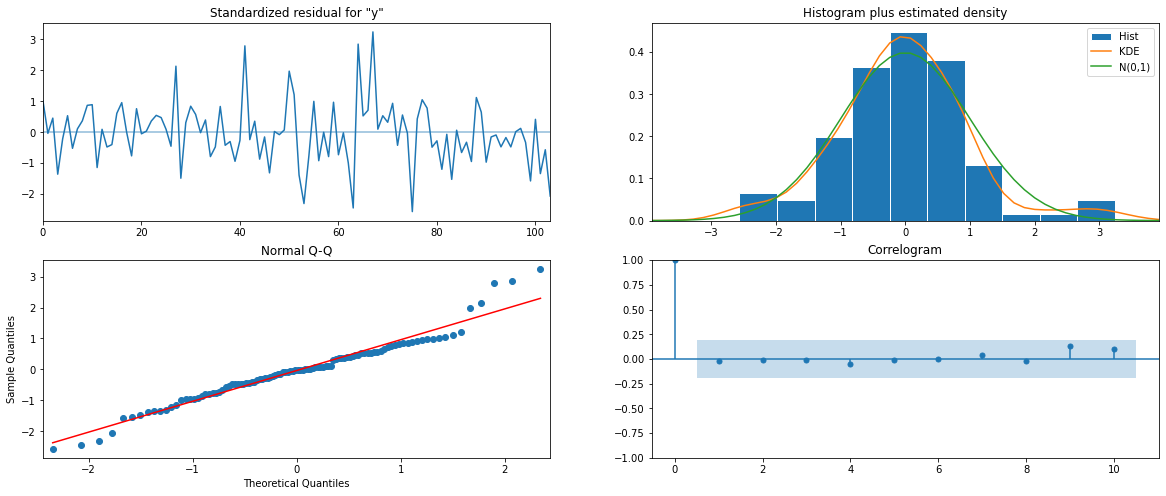

In [120]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

Predict on the Test Set using this model

In [121]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(test))
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.397207  388.344077     566.256802    2088.537611
1  1315.120412  402.006471     527.202207    2103.038617
2  1621.598432  402.000078     833.692758    2409.504105
3  1598.877146  407.237534     800.706246    2397.048046
4  1392.698089  407.967508     593.096468    2192.299711

In [122]:
rmse = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.6111845802303


Test Data - RMSE 

In [123]:
rmse_model5_12_test = mean_squared_error(test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print("For SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model5_12_test))

For SARIMA on the Test Data,  RMSE is 528.611


In [124]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model5_12_test]},index=['SARIMA(1,1,2)(1,0,2,12)'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.008384
Alpha= 0.663, Beta= 9.966, DES        5291.879833
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   378.951023
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315
ARIMA(2,1,2)                          1299.980468
SARIMA(0,1,2)(2,0,2,6)                 601.202408
SARIMA(1,1,2)(1,0,2,12)                528.611185

7.Build ARIMA/SARIMA models based on the cut-off points of ACF and PACF on the training data and evaluate this model on the test data using RMSE.

Arima Manual

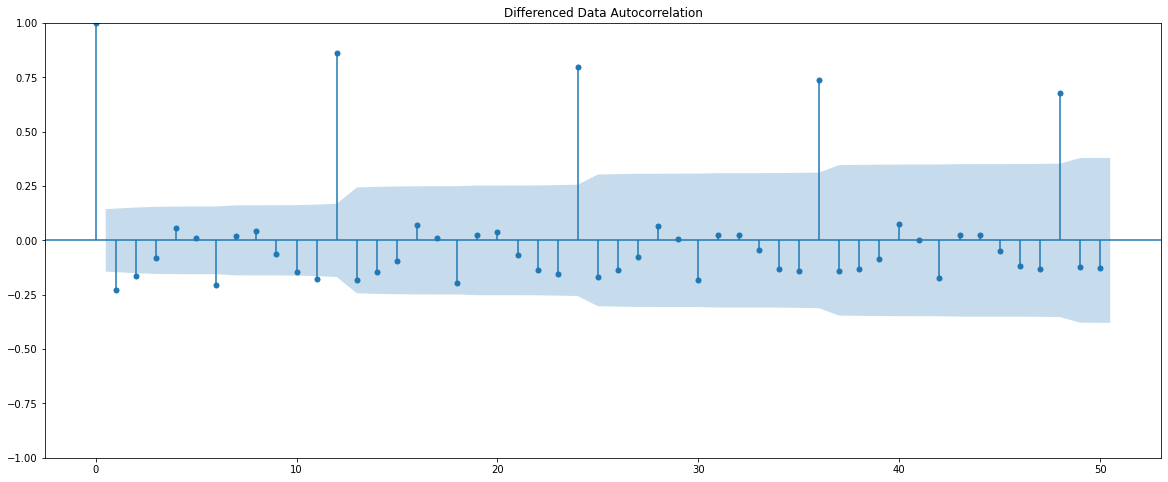

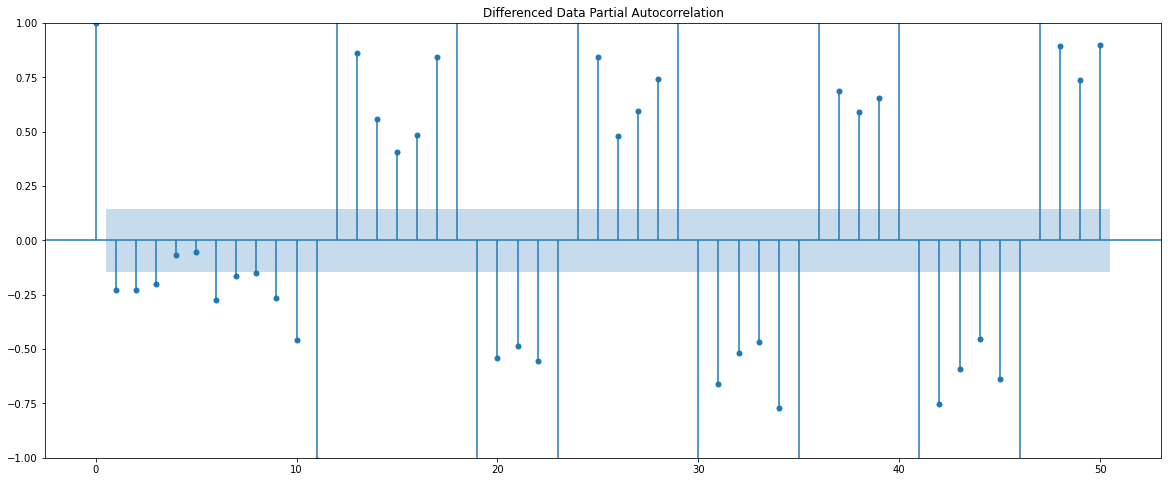

In [125]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Partial Autocorrelation')
plt.show()

In [126]:
manual_ARIMA = sm.tsa.arima.ARIMA(train['Sparkling'].astype('float64'), order=(0,1,2),freq='M')
results_manual_ARIMA = manual_ARIMA.fit()
print(results_manual_ARIMA.summary())

                               SARIMAX Results                                
Dep. Variable:              Sparkling   No. Observations:                  132
Model:                 ARIMA(0, 1, 2)   Log Likelihood               -1114.204
Date:                Sun, 26 Mar 2023   AIC                           2234.408
Time:                        23:25:12   BIC                           2243.034
Sample:                    01-31-1980   HQIC                          2237.913
                         - 12-31-1990                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ma.L1         -0.5478      0.860     -0.637      0.524      -2.234       1.139
ma.L2         -0.4515      0.511     -0.884      0.376      -1.452       0.549
sigma2      1.381e+06   1.23e+06      1.127      0.2

Predict on the Test Set using this model

In [127]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(test))

Test Data - RMSE 

In [128]:
rmse_model6_test = mean_squared_error(test['Sparkling'],predicted_manual_ARIMA,squared=False)
print("For MANUAL ARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model6_test))

For MANUAL ARIMA on the Test Data,  RMSE is 1296.523


In [129]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model6_test]},index=['MANUAL ARIMA(0,1,2)'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.008384
Alpha= 0.663, Beta= 9.966, DES        5291.879833
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   378.951023
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315
ARIMA(2,1,2)                          1299.980468
SARIMA(0,1,2)(2,0,2,6)                 601.202408
SARIMA(1,1,2)(1,0,2,12)                528.611185
MANUAL ARIMA(0,1,2)                   1296.522820

Sarima manual

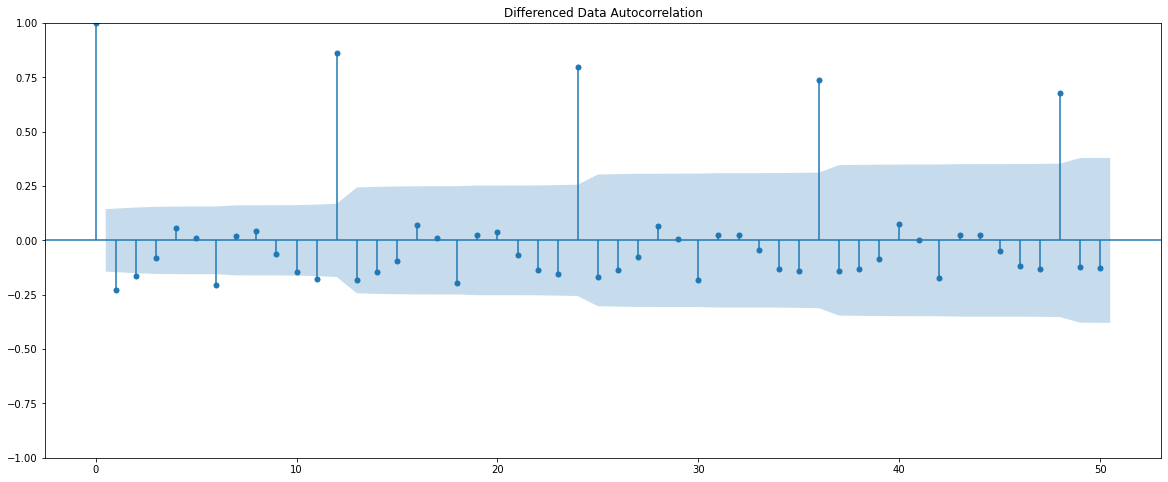

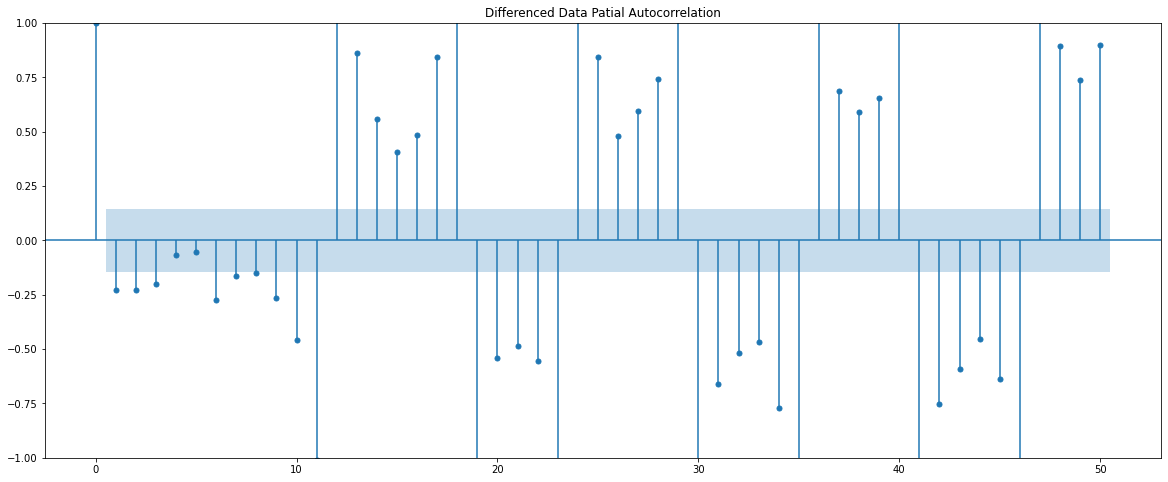

In [130]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Patial Autocorrelation')
plt.show()

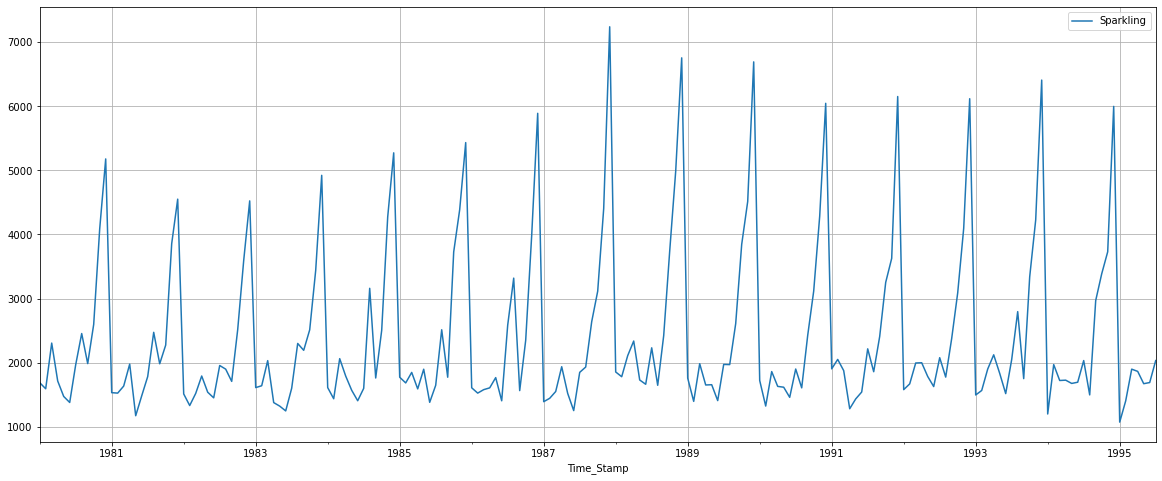

In [131]:
df.plot()
plt.grid();

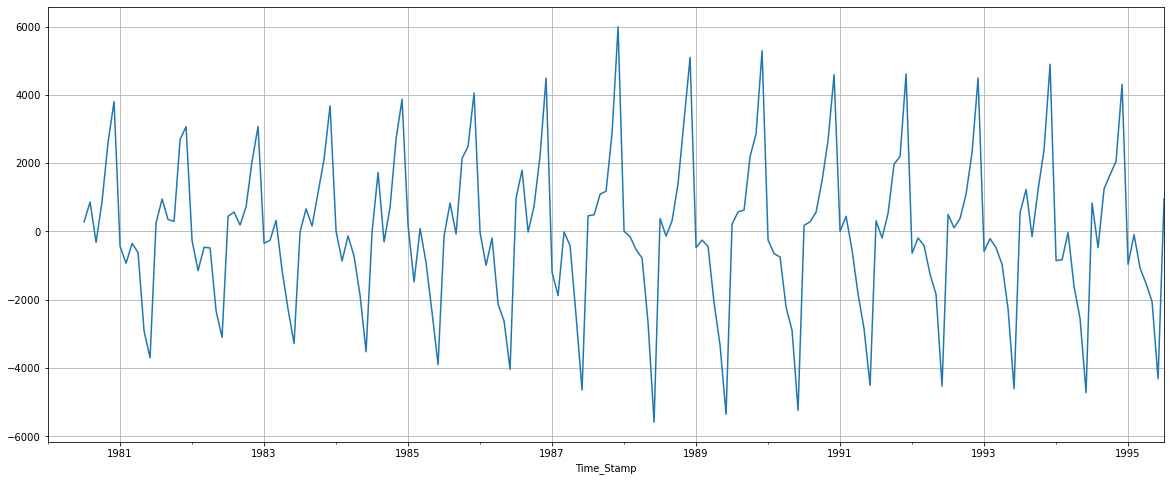

In [132]:
(df['Sparkling'].diff(6)).plot()
plt.grid();

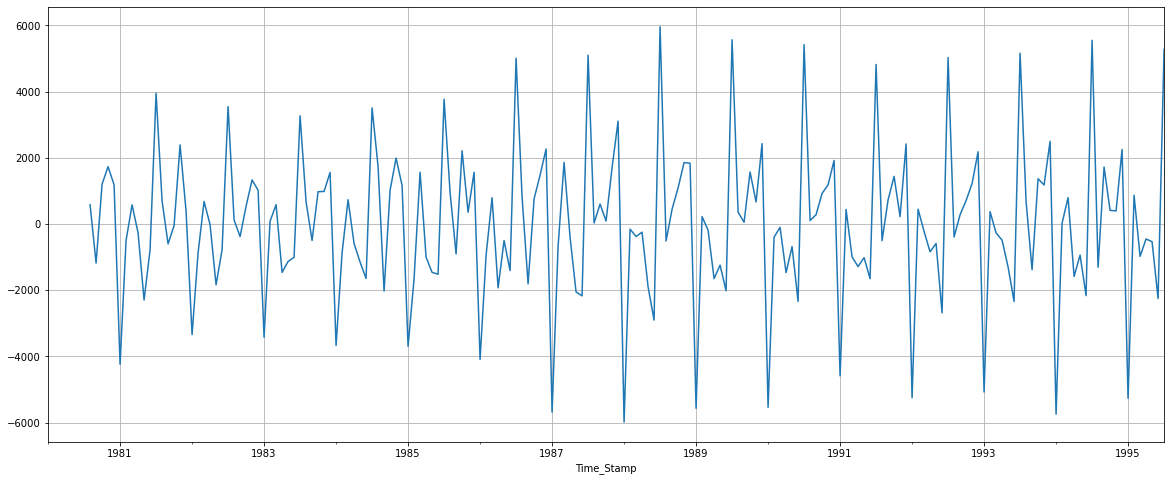

In [133]:
(df['Sparkling'].diff(6)).diff().plot()
plt.grid();

Checking the stationarity

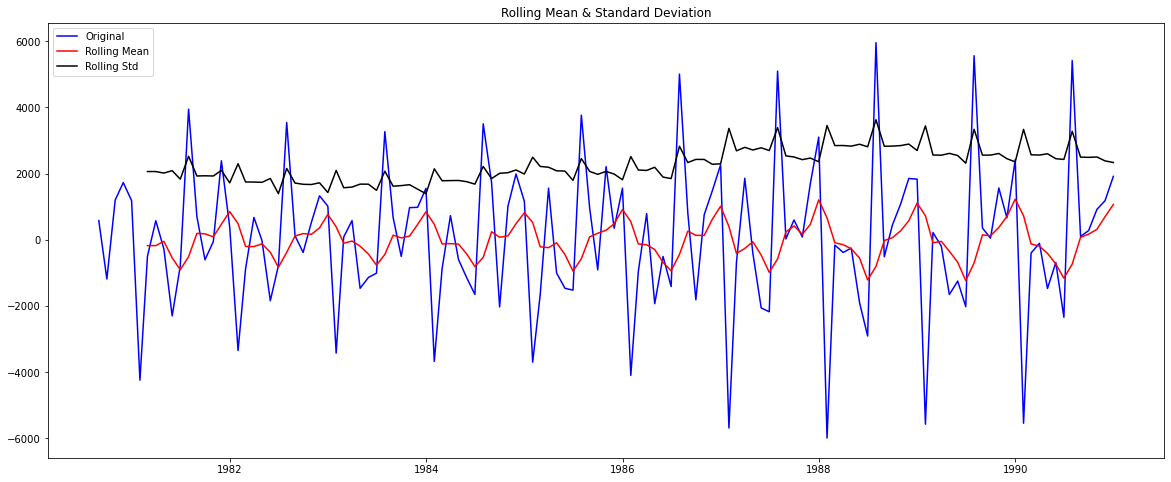

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [134]:
test_stationarity((train['Sparkling'].diff(6).dropna()).diff(1).dropna())

Checking the ACF and the PACF plots

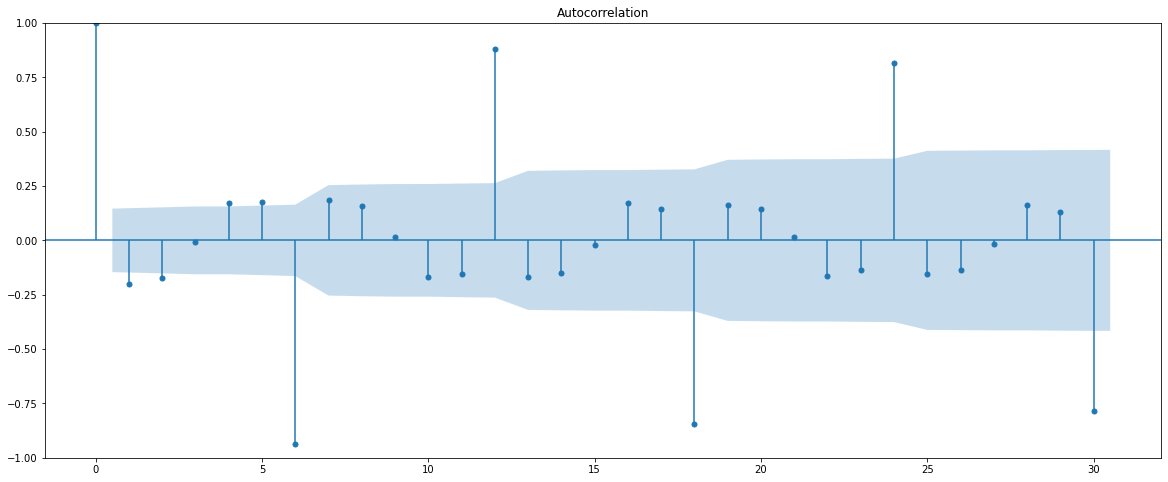

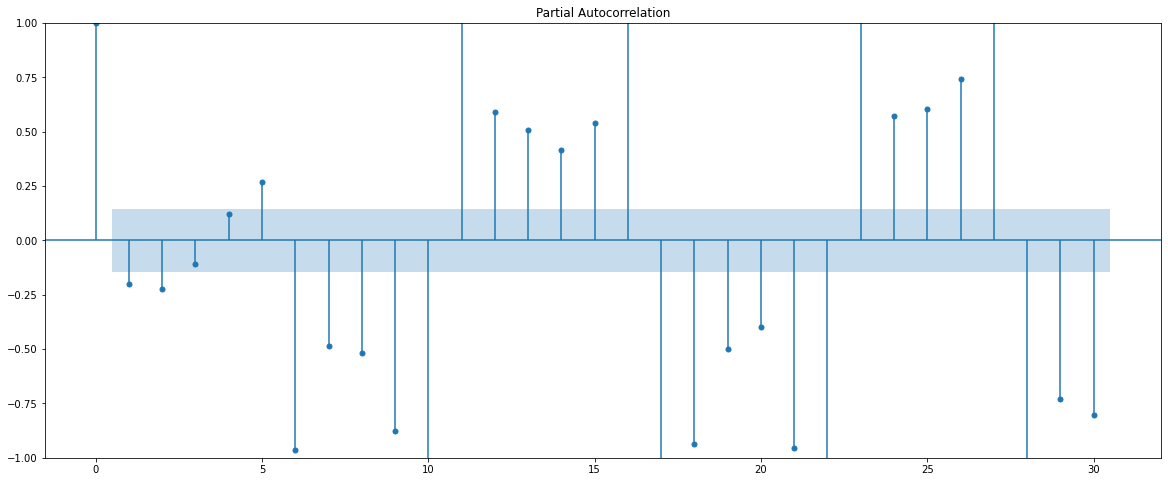

In [135]:
plot_acf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=30);

In [136]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.835
Date:                           Sun, 26 Mar 2023   AIC                           1727.671
Time:                                   23:25:15   BIC                           1749.700
Sample:                                        0   HQIC                          1736.613
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6452      0.286     -2.256      0.024      -1.206      -0.085
ma.L1         -0.3354      0.227     -1.474

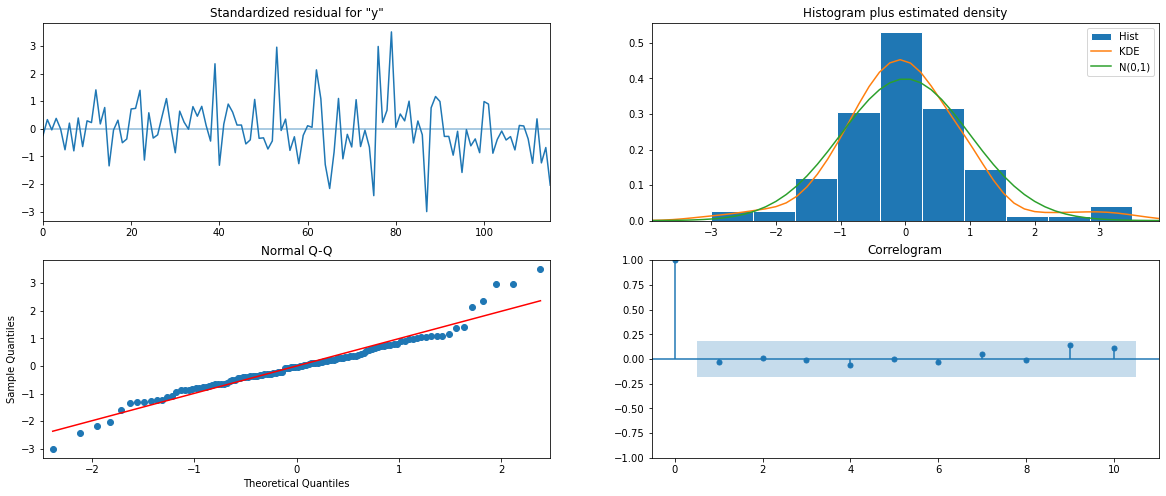

In [137]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

Predict on the Test Set using this model. 

In [138]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(test))
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.480677  380.584436     584.548889    2076.412464
1  1177.407300  392.126331     408.853814    1945.960786
2  1625.958839  392.320536     857.024718    2394.892960
3  1546.489305  397.721193     766.970091    2326.008519
4  1308.770821  398.939277     526.864205    2090.677436

In [139]:
rmse_model7_test = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print("For MANUAL SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model7_test))

For MANUAL SARIMA on the Test Data,  RMSE is 626.717


Test Data - RMSE 

In [140]:
rmse_model7_test = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print("For MANUAL SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model7_test))

For MANUAL SARIMA on the Test Data,  RMSE is 626.717


In [141]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model7_test]},index=['MANUAL SARIMA(1,1,2)(2,0,2,6)'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.008384
Alpha= 0.663, Beta= 9.966, DES        5291.879833
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   378.951023
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315
ARIMA(2,1,2)                          1299.980468
SARIMA(0,1,2)(2,0,2,6)                 601.202408
SARIMA(1,1,2)(1,0,2,12)                528.611185
MANUAL ARIMA(0,1,2)                   1296.522820
MANUAL SARIMA(1,1,2)(2,0,2,6)          626.716964

SARIMA AT 12

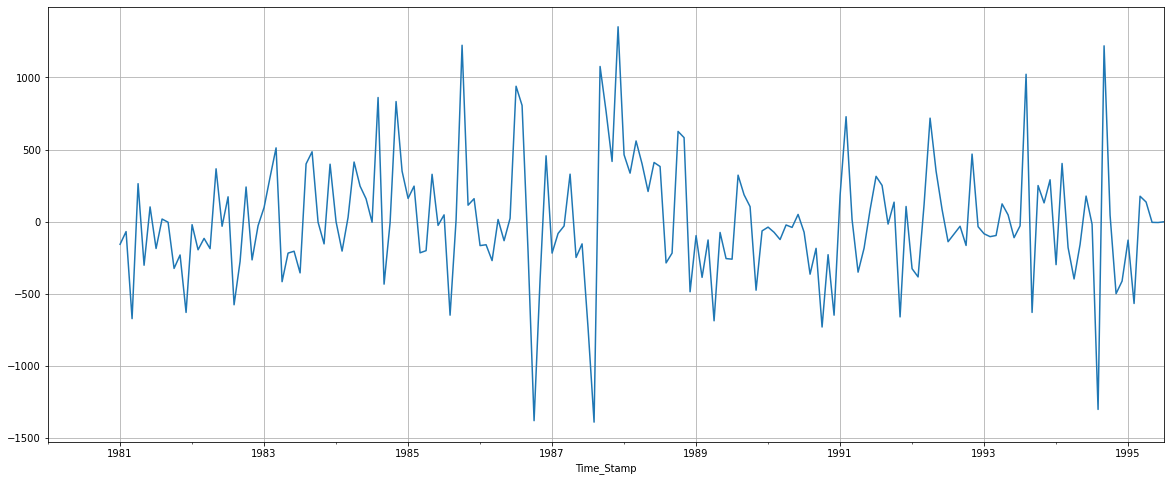

In [142]:
(df['Sparkling'].diff(12)).plot()
plt.grid();

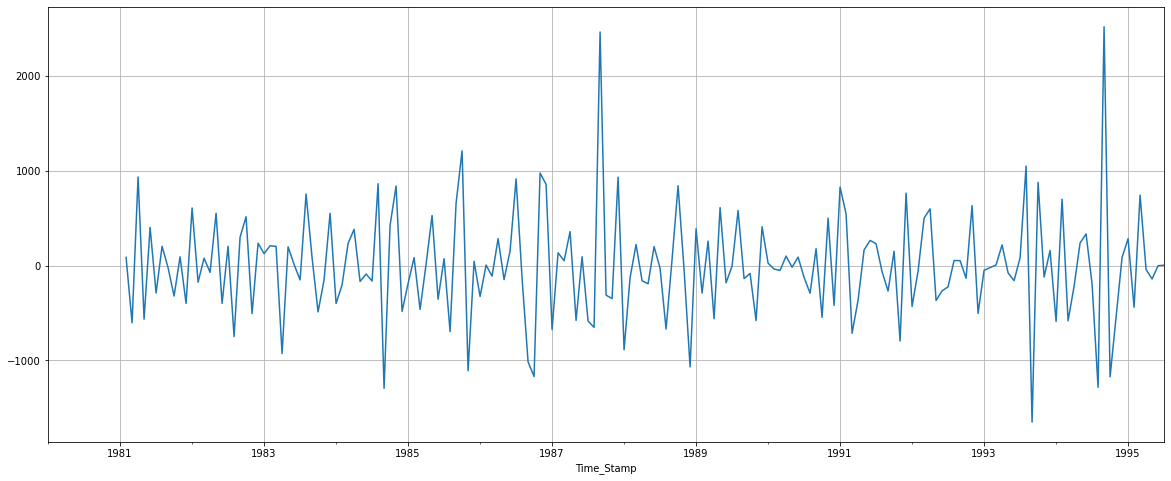

In [143]:
(df['Sparkling'].diff(12)).diff().plot()
plt.grid();

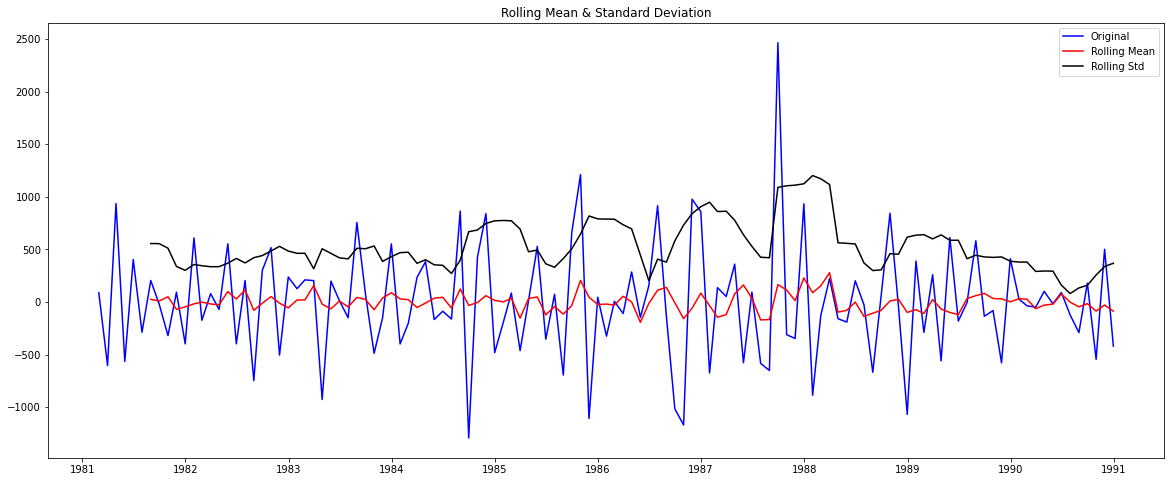

Results of Dickey-Fuller Test:
Test Statistic                  -3.342905
p-value                          0.013066
#Lags Used                      10.000000
Number of Observations Used    108.000000
Critical Value (1%)             -3.492401
Critical Value (5%)             -2.888697
Critical Value (10%)            -2.581255
dtype: float64 



In [144]:
test_stationarity((train['Sparkling'].diff(12).dropna()).diff(1).dropna())

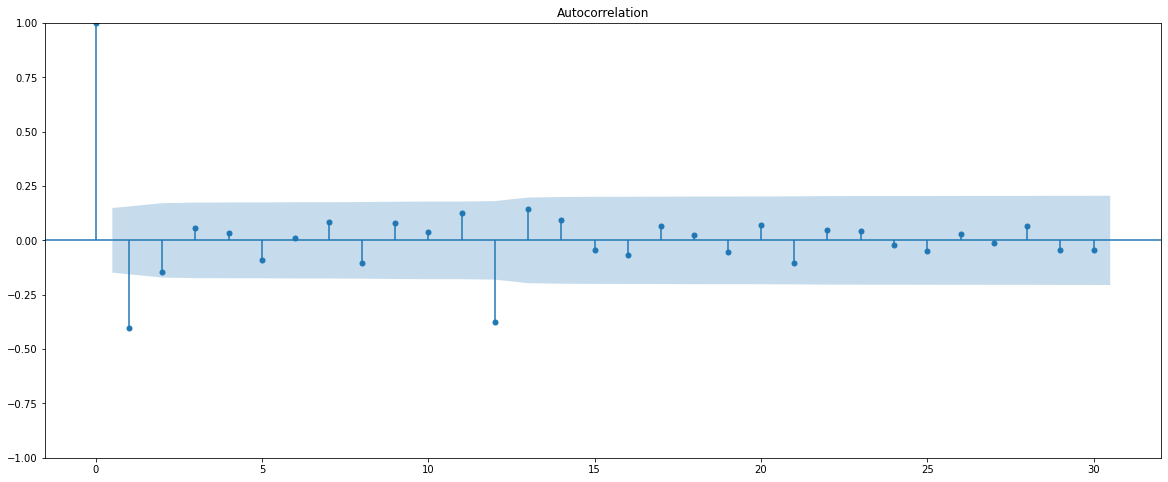

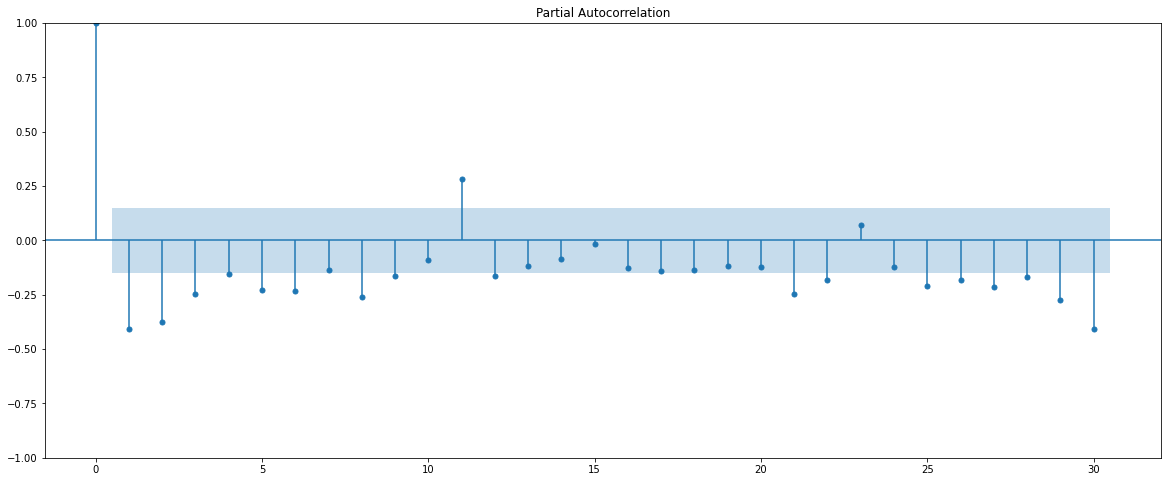

In [145]:
plot_acf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30)
plot_pacf((df['Sparkling'].diff(12).dropna()).diff(1).dropna(),lags=30);

In [146]:
import statsmodels.api as sm

manual_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_12 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.835
Date:                           Sun, 26 Mar 2023   AIC                           1727.671
Time:                                   23:25:18   BIC                           1749.700
Sample:                                        0   HQIC                          1736.613
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6452      0.286     -2.256      0.024      -1.206      -0.085
ma.L1         -0.3354      0.227     -1.474

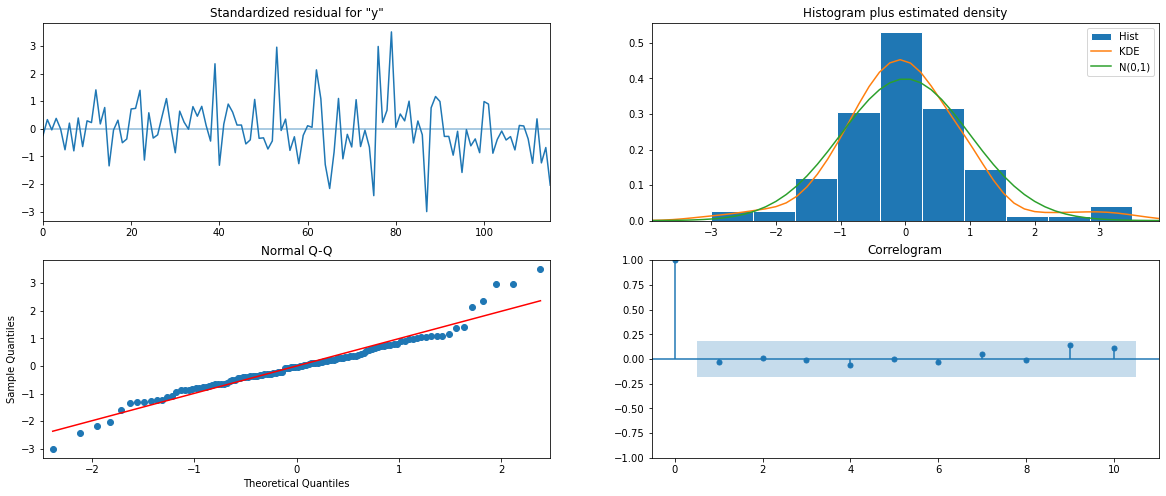

In [147]:
results_manual_SARIMA_12.plot_diagnostics()
plt.show()

Predict on the Test Set using this model.

In [148]:
predicted_manual_SARIMA_12 = results_manual_SARIMA_12.get_forecast(steps=len(test))
predicted_manual_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.480677  380.584436     584.548889    2076.412464
1  1177.407300  392.126331     408.853814    1945.960786
2  1625.958839  392.320536     857.024718    2394.892960
3  1546.489305  397.721193     766.970091    2326.008519
4  1308.770821  398.939277     526.864205    2090.677436

In [149]:
rmse = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print(rmse)

626.7169638913105


Test Data - RMSE 

In [150]:
rmse_model8_test = mean_squared_error(test['Sparkling'],predicted_manual_SARIMA_12.predicted_mean,squared=False)
print("For MANUAL SARIMA on the Test Data,  RMSE is %3.3f" %(rmse_model8_test))

For MANUAL SARIMA on the Test Data,  RMSE is 626.717


In [151]:
resultsDf_temp = pd.DataFrame({'Test RMSE': [rmse_model8_test]},index=['MANUAL SARIMA(1,1,2)(2,0,2,12)'])
resultsDf = pd.concat([resultsDf, resultsDf_temp])
resultsDf

Test RMSE
Alpha= 0.07, SES                      1338.008384
Alpha= 0.663, Beta= 9.966, DES        5291.879833
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   378.951023
Regression                            1389.135175
Naive Model                           3864.279352
Simple Average Model                  1275.081804
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
6point Trailing Moving Average        1283.927428
9 point Trailing Moving Average       1346.278315
ARIMA(2,1,2)                          1299.980468
SARIMA(0,1,2)(2,0,2,6)                 601.202408
SARIMA(1,1,2)(1,0,2,12)                528.611185
MANUAL ARIMA(0,1,2)                   1296.522820
MANUAL SARIMA(1,1,2)(2,0,2,6)          626.716964
MANUAL SARIMA(1,1,2)(2,0,2,12)         626.716964

8.Build a table with all the models built along with their corresponding parameters and the respective RMSE values on the test data.

In [152]:
resultsDf.sort_values(by='Test RMSE')

Test RMSE
Alpha=0.1, Beta=0.01, Gamma=0.5, TES   378.951023
SARIMA(1,1,2)(1,0,2,12)                528.611185
SARIMA(0,1,2)(2,0,2,6)                 601.202408
MANUAL SARIMA(1,1,2)(2,0,2,6)          626.716964
MANUAL SARIMA(1,1,2)(2,0,2,12)         626.716964
2point Trailing Moving Average         813.400684
4 point Trailing Moving Average       1156.589694
Simple Average Model                  1275.081804
6point Trailing Moving Average        1283.927428
MANUAL ARIMA(0,1,2)                   1296.522820
ARIMA(2,1,2)                          1299.980468
Alpha= 0.07, SES                      1338.008384
9 point Trailing Moving Average       1346.278315
Regression                            1389.135175
Naive Model                           3864.279352
Alpha= 0.663, Beta= 9.966, DES        5291.879833

9.Based on the model-building exercise, build the most optimum model(s) on the complete data and predict 12 months into the future with appropriate confidence intervals/bands.

Building the most optimum model on the full data. 

In [153]:
fullmodel = ExponentialSmoothing(df,
                                  trend='additive',
                                  seasonal='multiplicative').fit(smoothing_level=0.25,
                                                                 smoothing_trend=0.0,
                                                                 smoothing_seasonal=0.74)

In [154]:
RMSE_fullmodel = mean_squared_error(df['Sparkling'],fullmodel.fittedvalues,squared=False)

print('RMSE:',RMSE_fullmodel)

RMSE: 399.79146230524583


In [155]:
prediction = fullmodel.forecast(steps=len(test))
prediction= fullmodel.forecast(steps=12)
prediction

1995-08-31    1679.266329
1995-09-30    2768.526417
1995-10-31    2905.648034
1995-11-30    3327.643023
1995-12-31    5399.746685
1996-01-31    1010.933577
1996-02-29    1433.116578
1996-03-31    1830.575335
1996-04-30    1772.338640
1996-05-31    1604.363500
1996-06-30    1610.177978
1996-07-31    1859.789557
Freq: M, dtype: float64

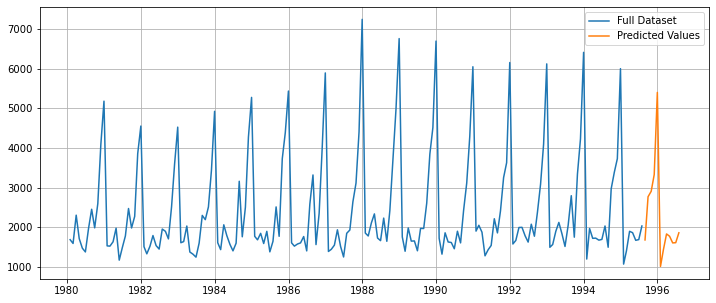

In [156]:
plt.figure(figsize=(12,5))
plt.plot(df['Sparkling'],label='Full Dataset')
plt.plot(prediction,label='Predicted Values')
plt.legend(loc='best')
plt.grid();

In [157]:
pred_df = pd.DataFrame({'lower_CI':prediction - ((np.percentile(prediction,[2.5,97.5])))[0],
                          'prediction':prediction,
                          'upper_ci': prediction + ((np.percentile(prediction,[2.5,97.5])))[1]})
pred_df.head()

lower_CI   prediction      upper_ci
1995-08-31   552.232427  1679.266329   6509.184507
1995-09-30  1641.492515  2768.526417   7598.444595
1995-10-31  1778.614131  2905.648034   7735.566211
1995-11-30  2200.609120  3327.643023   8157.561201
1995-12-31  4272.712783  5399.746685  10229.664863

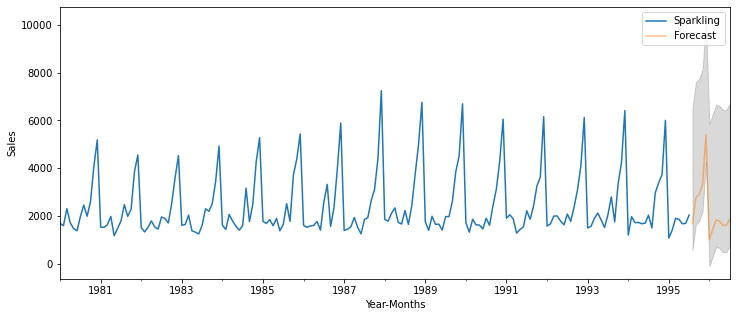

In [158]:
axis = df.plot(label='Actual', figsize=(12,5))
pred_df['prediction'].plot(ax=axis, label='Forecast', alpha=0.5)
axis.fill_between(pred_df.index, pred_df['lower_CI'], pred_df['upper_ci'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sales')
plt.legend(loc='best')
plt.show()

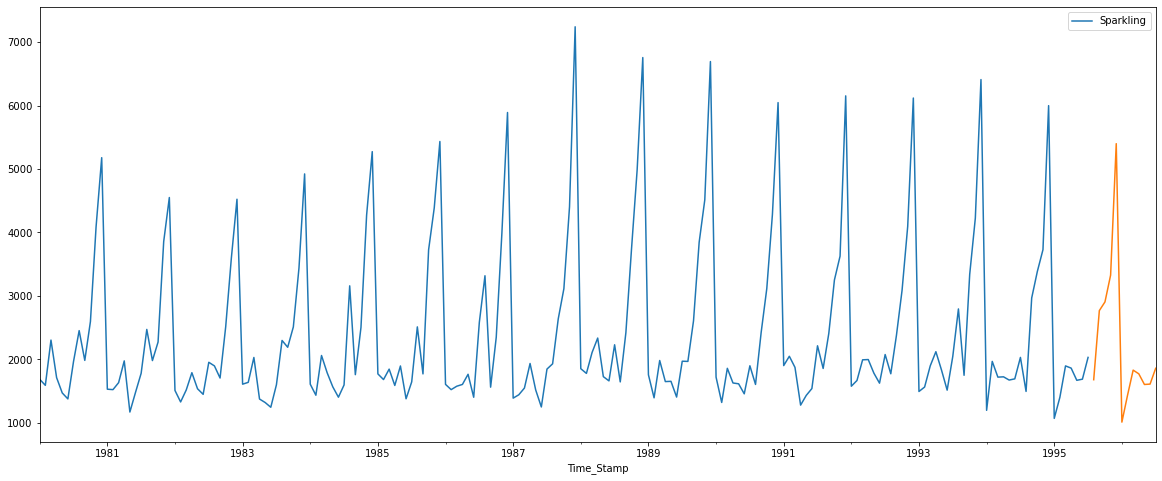

In [159]:
df.plot()
prediction.plot();